### Summary
This notebook plots the mean profiles and uses the kernel of ReadIn_new.ipynb.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
import pandas as pd
from matplotlib.legend_handler import HandlerTuple

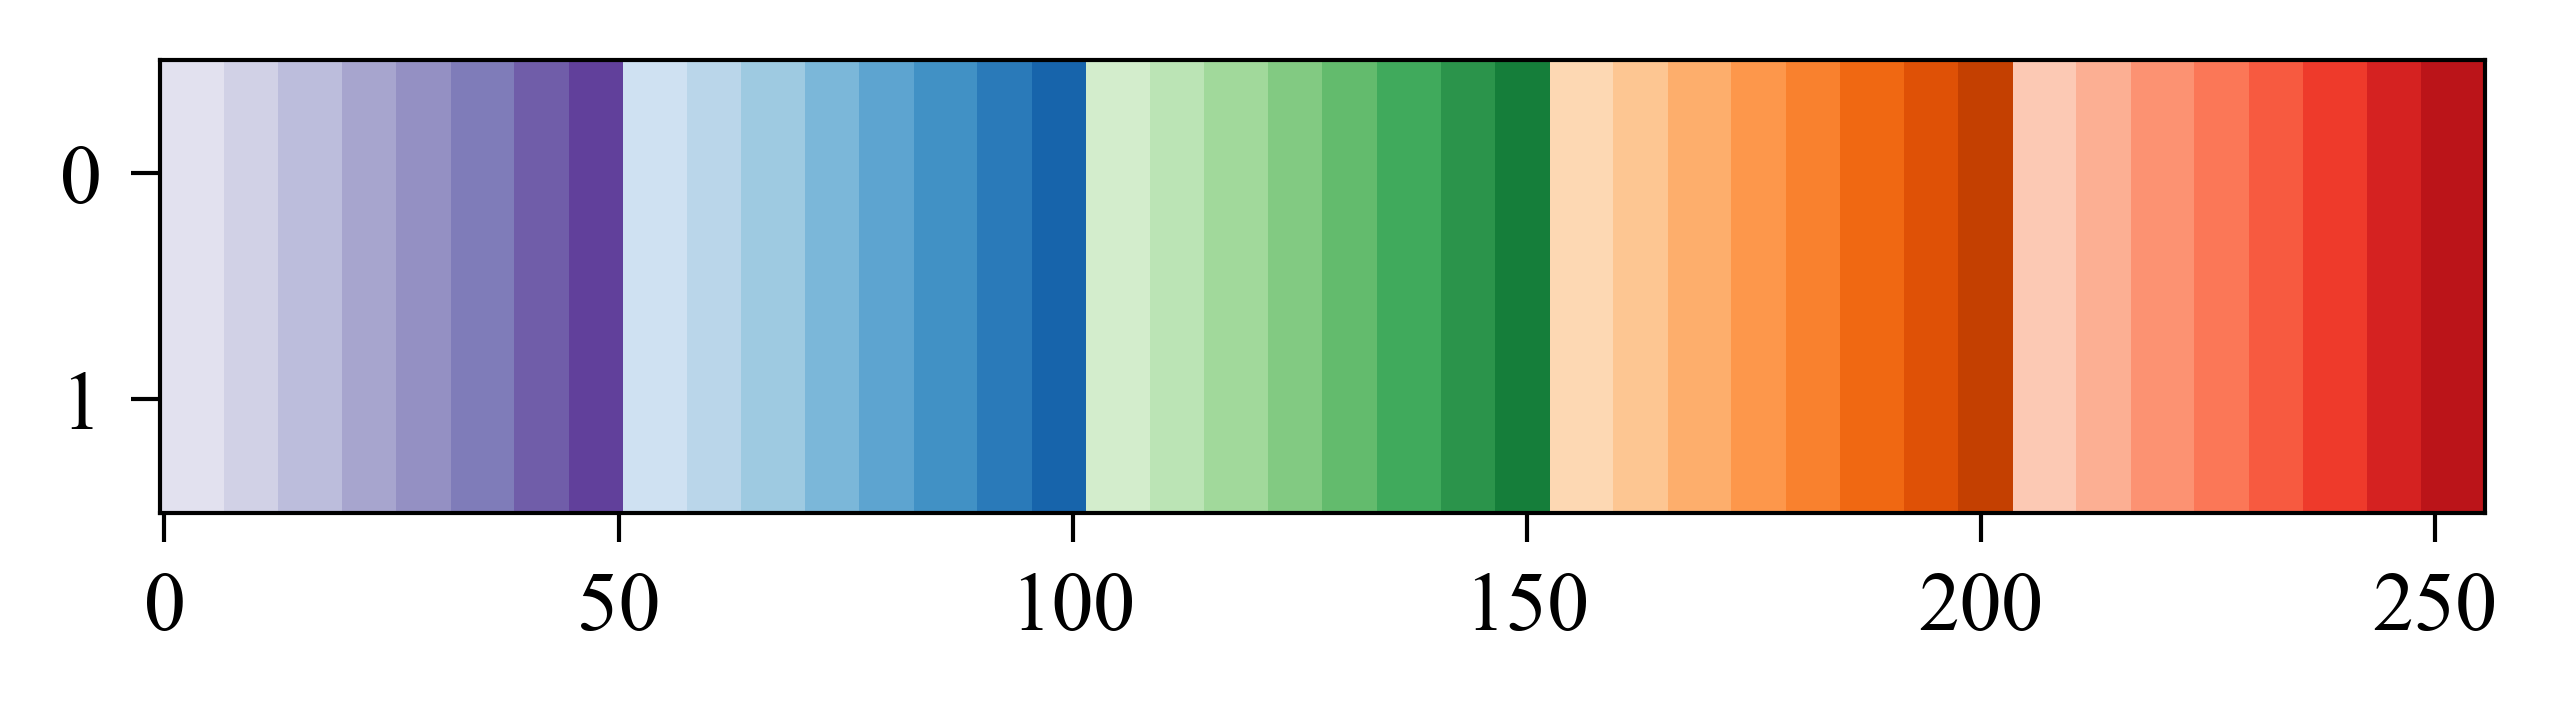

In [14]:
N = 8 # number of colors to extract from each of the base_cmaps below
base_cmaps = ['Purples','Blues','Greens','Oranges','Reds',]

n_base = len(base_cmaps)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.2,0.8,N)) for name in base_cmaps])
cmap = mpl.colors.ListedColormap(colors) 

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cmap)

In [19]:
# ak = 0.05
(case13.cc,case14.cc) = cmap((6,3))
(case13.marker,case14.marker) = ('s','s')
# ak = 0.1
(case4.cc, case5.cc, case6.cc) = cmap((13,11,9))
(case4.marker, case5.marker, case6.marker) = ('o','^','s')
(case_rerun1.cc, case_rerun2.cc, case_rerun3.cc) = cmap((13,11,9))
(case_rerun1.marker, case_rerun2.marker, case_rerun3.marker) = ('o','^','s')
# ak = 0.15
(case7.cc, case8.cc, case9.cc, case10.cc, case11.cc, case12.cc) = cmap((23,22,21,20,19,18))
(case7.marker, case8.marker, case9.marker, case10.marker, case11.marker, case12.marker) = ('o','x','^','x','s','x')
# ak = 0.2
(case1.cc, case2.cc, case3.cc) = cmap((29,27,25))
(case1.marker, case2.marker, case3.marker) = ('o','^','s')
# ak = 0.25
(case14.cc, case15.cc, case16.cc) = cmap((39,37,35))
(case14.marker, case15.marker, case16.marker) = ('o','^','s')

In [9]:
Banner1990 = pd.read_csv('otherdata/mean_profile/Banner1990_exp.csv', names=['u_plus','z_plus'], delimiter=',')
Buckley2020_1 = pd.read_csv('otherdata/mean_profile/Buckley2020_exp_ak0.06.csv', names=['z_plus','u_plus'], delimiter=',')
Buckley2020_2 = pd.read_csv('otherdata/mean_profile/Buckley2020_exp_ak0.17.csv', names=['z_plus','u_plus'], delimiter=',')

In [20]:
from scipy.interpolate import interp1d
def air_profile_new(u_air, eta):
    """ uwater: a 2D array of water velocity 
        eta: a 1D array of surface """
    u_air_interp = np.zeros(u_air.shape)
    zplot = np.zeros(u_air.shape) # To show in the original cartesian grid z where the interpolating grid z' is
    for i in range(u_air.shape[0]): # For each x
        z = np.linspace(-1,2*np.pi-1,512,endpoint=False) + 2*np.pi/2/512
        f = interp1d(z, u_air[i,:], kind='quadratic')
        # The ratio to make sure that the cartesian representation of z' falls within the domain
        zeta = np.linspace(-1,2*np.pi-1,512,endpoint=False) + 2*np.pi/2/512
        zgrid = zeta + eta[i]*np.exp(-1*np.abs(zeta))
        zplot[i] = zgrid
        ugrid = f(zgrid[10:-10]) # Don't have to fill it all
        u_air_interp[i,10:-10] = ugrid
    u_air_1D = np.average(u_air_interp[:,:], axis=0)
    return u_air, u_air_interp, u_air_1D, zeta, zplot

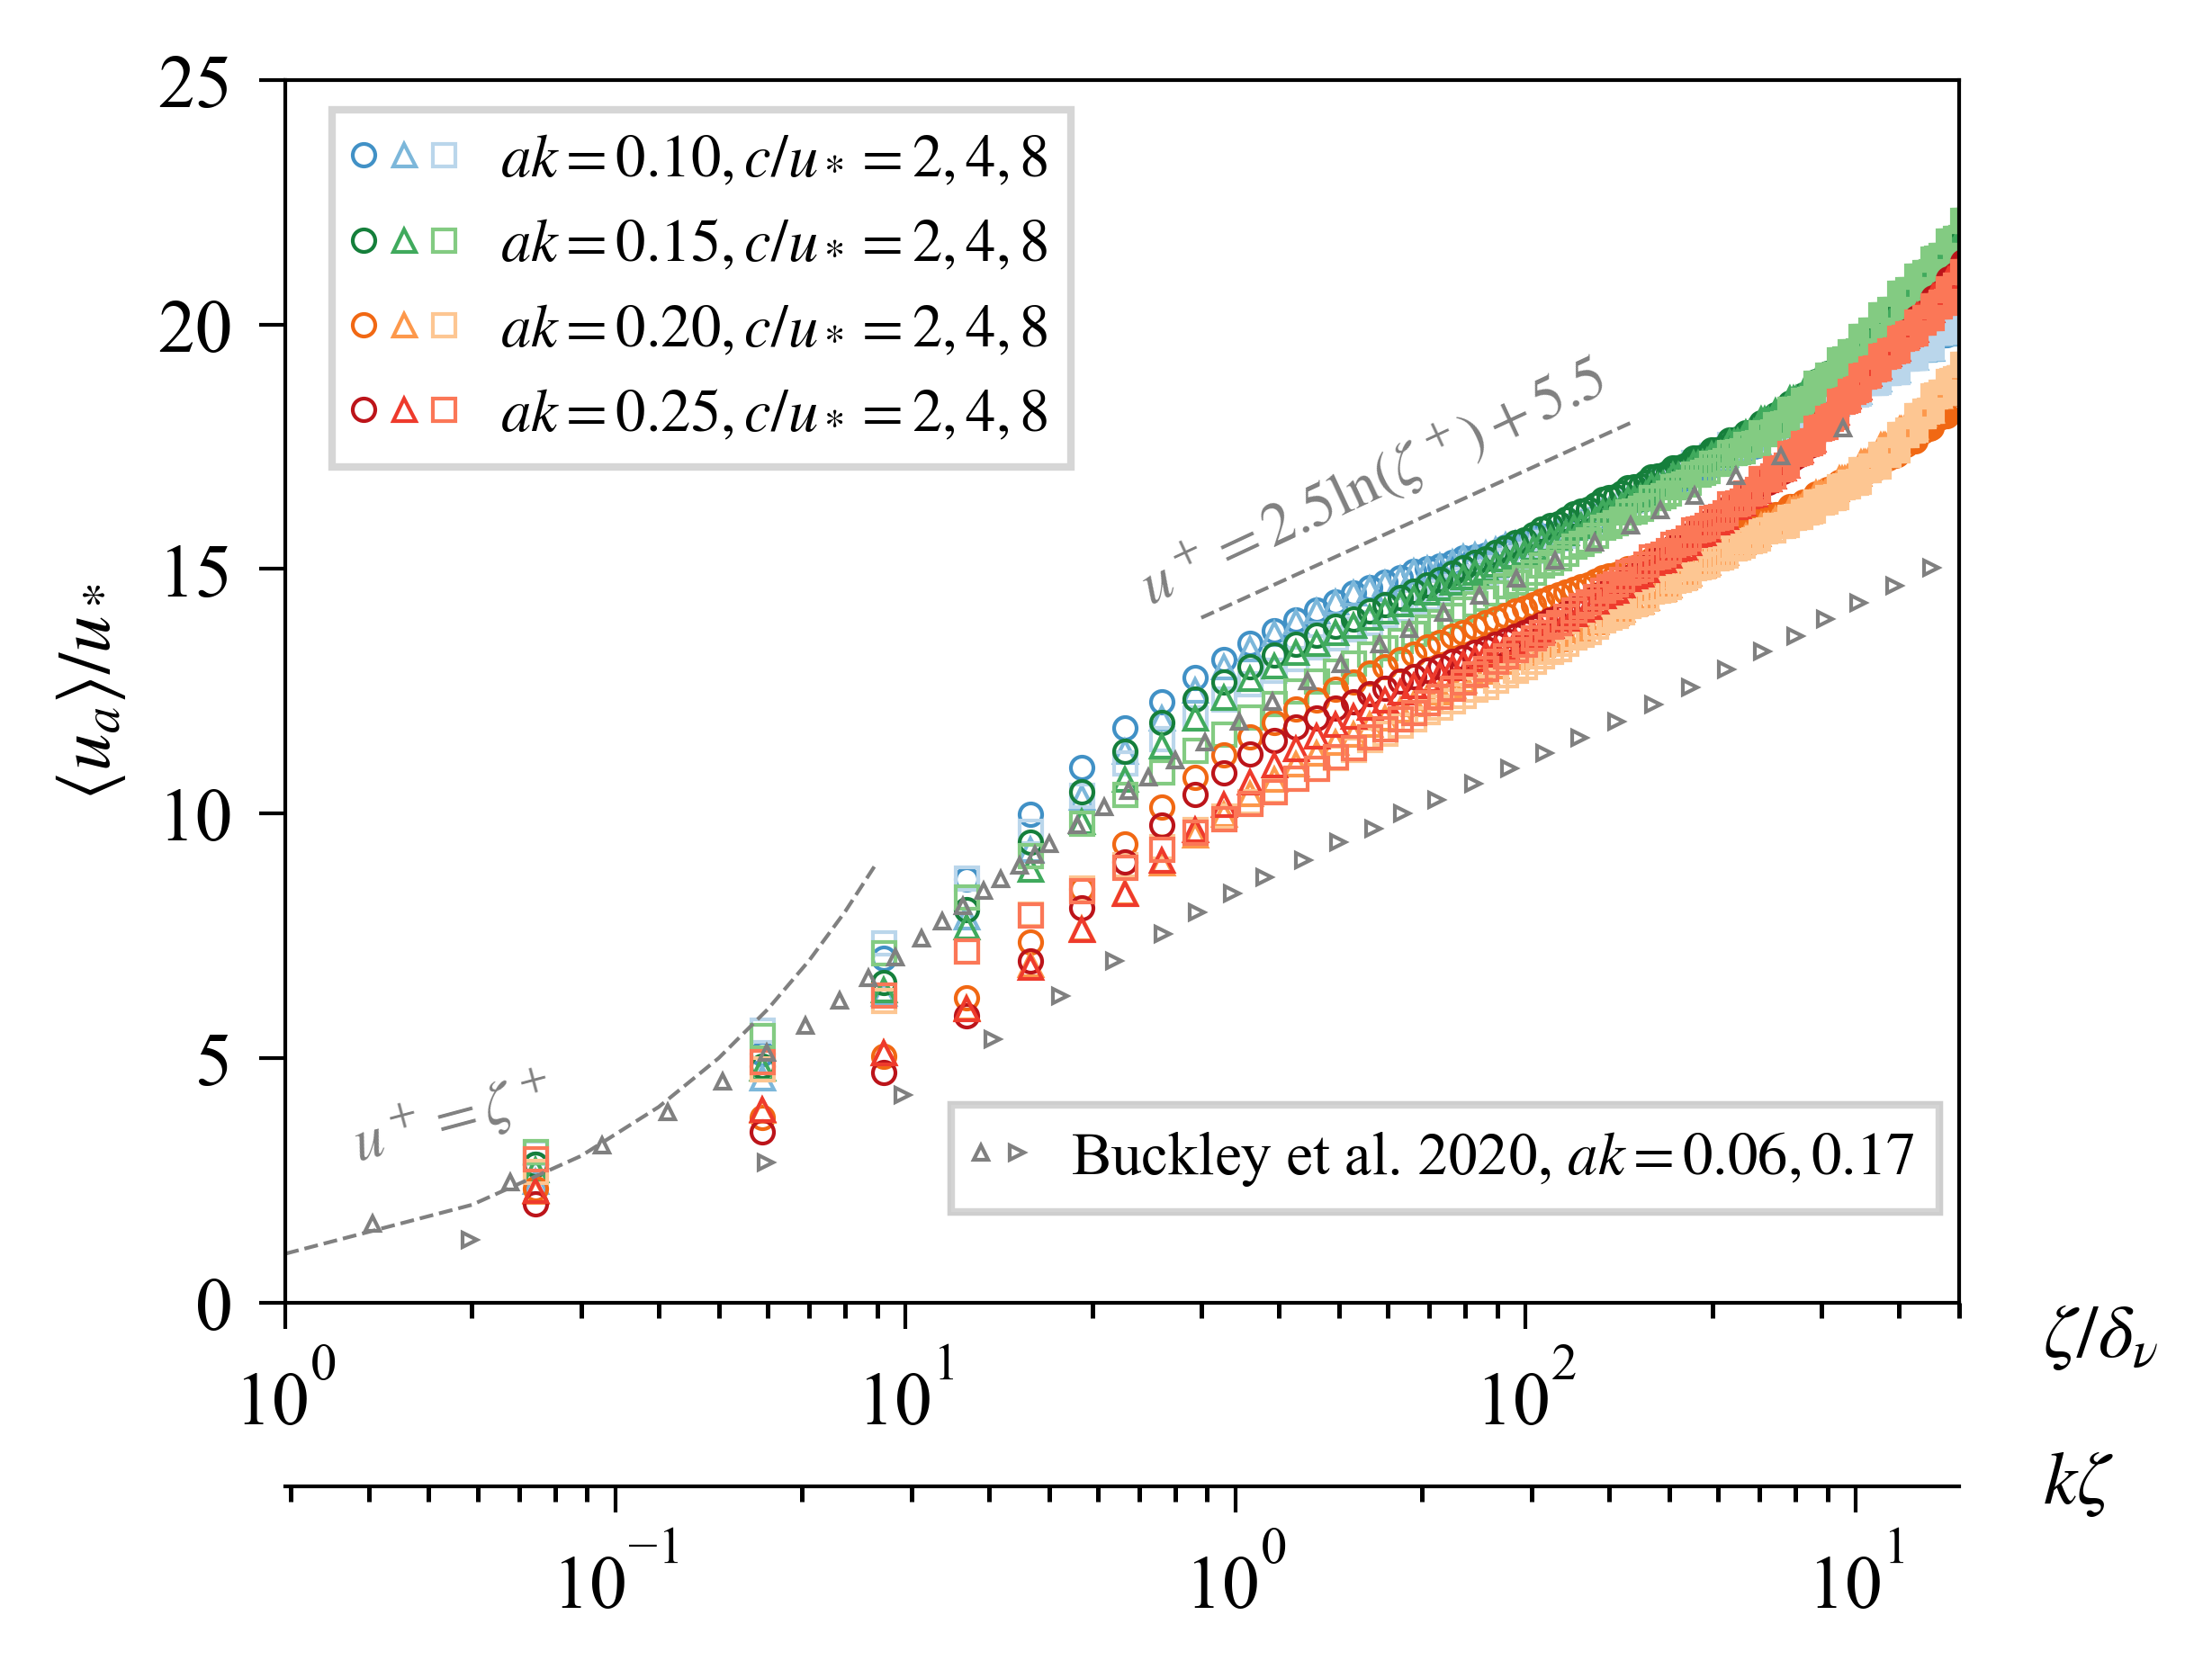

In [30]:
# """Plot the average water profile for the STATIONARY wave cases."""

fig = plt.figure(figsize=[4,3]); ax = plt.gca()

"""The stationary wave case"""

def draw (case):
    ytau = (2*np.pi-1)/case.Retau
    
    uxmean = np.average(case.ux_2D[5:], axis=(0))
    fmean = np.average(case.f_2D[5:], axis=0)
    phasei = -1 # Is this ok?
    idx = case.phase['idx'][phasei]
    eta = np.roll(case.phase['eta'][phasei], -idx, axis=1) 
    eta_1D = np.average(eta, axis=0) - np.average(eta) 
    ux_2D = uxmean*(1-fmean)**4
    u_air, u_air_interp, u_air_1D, zeta, zplot = air_profile_new (ux_2D, eta_1D)
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
    """ No coordinate transform """
#     l, = plt.plot((case.yarray[31:-1:2]-1)/ytau, np.average(case.uxmean, axis=0)[31:-1:2]/case.ustar, 
#               marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
#               label = r'$ak=%g, c/u_*=%.0f$' %(case.ak, case.wave.c/case.ustar), color=case.cc) 
    """ Coordinate transform """
    l, = plt.plot((case.yarray[31:-1:2]-1)/ytau, u_air_1D[31:-1:2]/case.ustar, 
              marker = case.marker, mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
              label = r'$ak=%g, c/u_*=%.0f$' %(case.ak, case.wave.c/case.ustar), color=case.cc) 
    return l

case_ensem = (case_rerun1,case_rerun2,case_rerun3, case7,case9,case11, case1,case2,case3, case14,case15,case16)
l_ensem = []
for i,case in enumerate(case_ensem):
    l = draw(case)
    l_ensem.append(l)

# case_ensem = (case_rerun1,case_rerun2,case_rerun3)
# l_ensem = []
# for i,case in enumerate(case_ensem):
#     l = draw(case)
#     l_ensem.append(l)
    
# case_ensem = (case14,case15,case16)
# l_ensem = []
# for i,case in enumerate(case_ensem):
#     print(len(case.ux_2D))
#     l = draw(case)
#     l_ensem.append(l)
    
# case_ensem = (case1,case2,case3)
# l_ensem = []
# for i,case in enumerate(case_ensem):
#     l = draw(case)
#     l_ensem.append(l)
    
# case_ensem = (case7,case9,case11)
# l_ensem = []
# for i,case in enumerate(case_ensem):
#     l = draw(case)
#     l_ensem.append(l)

# d5, = plt.plot(Banner1990['z_plus']/4.3*10**4/9, Banner1990['u_plus'], marker='s', lw=0, mfc='none', markersize=2, markeredgewidth=0.5, alpha = 1, color='gray', label='Banner 1990')
d6, = plt.plot(Buckley2020_1['z_plus'], Buckley2020_1['u_plus'], marker='^', lw=0, mfc='none', markersize=2, markeredgewidth=0.5, alpha = 1, color='gray', label='Banner 1990')
d7, = plt.plot(Buckley2020_2['z_plus'], Buckley2020_2['u_plus'], marker='>', lw=0, mfc='none', markersize=2, markeredgewidth=0.5, alpha = 1, color='gray', label='Banner 1990')

legend1 = plt.legend([(l_ensem[0],l_ensem[1],l_ensem[2]), (l_ensem[3],l_ensem[4],l_ensem[5]), (l_ensem[6],l_ensem[7],l_ensem[8]), (l_ensem[9],l_ensem[10],l_ensem[11])], ['$ak=0.10, c/u_*=2,4,8$', '$ak=0.15, c/u_*=2,4,8$', '$ak=0.20, c/u_*=2,4,8$', '$ak=0.25, c/u_*=2,4,8$',],
                       handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left', bbox_to_anchor=(0.01, 1), fancybox=False, handlelength=1.6, fontsize=8)
legend2 = plt.legend([(d6, d7)], ['Buckley et al. 2020, $ak=0.06, 0.17$'],
                       handler_map={tuple: HandlerTuple(ndivide=None)}, loc='lower left', bbox_to_anchor=(0.38, 0.05), fancybox=False, handlelength=0.8, fontsize=8)
ax.add_artist(legend1)
ax.add_artist(legend2)


y = np.arange(1,10)
plt.plot(y, y, '--', color='gray', lw=0.5)
y = np.arange(30,150)
plt.plot(y, 1/0.4*np.log(y)+5.5, '--', color='gray', lw=0.5)
# plt.plot(y, 1/0.41*np.log(y)+6, color=plt.get_cmap('tab20c')(0))
ax.text(0.1, 0.15, r'$u^+=\zeta^+$', ha='center', va='center', rotation=15., fontsize=8, 
        color='gray', transform=ax.transAxes)
ax.text(0.65, 0.67, r'$u^+=2.5\ln(\zeta^+)+5.5$', ha='center', va='center', rotation=25, fontsize=8,
        color='gray', transform=ax.transAxes)
plt.xscale('log')
plt.ylim([0, 25])
plt.xlim([1, 500])
plt.ylabel(r'$\langle u_a \rangle /u_*$') 

ytau = (2*np.pi-1)/case.Retau

def forward(x):
    return x*ytau*case.k
def back(x):
    return x/case.k/ytau

secax_x2 = ax.secondary_xaxis(-0.15, functions=(forward, back))
ax.annotate(r'$k\zeta$', xy=(1.05, -0.12), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$\zeta/\delta_{\nu}$', xy=(1.05, 0), ha='left', va='top', xycoords='axes fraction')
fig.savefig('./review/mean_uair_allcases.pdf', bbox_inches='tight', pad_inches=0.1)

In [134]:
delta_nu = (2*np.pi-1)/720
a = 0.2/4
print(a/1.414/delta_nu)

4.819003564275327


In [22]:
case_rerun1 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.1, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/rerun/', prefix='curved_fixREtau_boundary_')
case_rerun1.tstart = 66
case_rerun2 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.1, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/rerun/', prefix='curved_fixREtau_boundary_')
case_rerun2.tstart = 66
case_rerun3 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.1, LEVEL=10, emax=0.3, alterMU=4, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/rerun/', prefix='curved_fixREtau_boundary_')
case_rerun3.tstart = 66

/projects/DEIKE/jiarongw/turbulence/rerun/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.1_MU16_LEVEL10_emax0.3/
mu1 = 7.67063e-06, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.0003125
Given k = 4 (1/m), calculated omega = 2.00499 (1/s), period = 3.13377 (s), phase speed c = 0.501248 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 1, c = 0.501248, Ustar = 0.25, MURATIO = 0.29296, mu_w = 7.67063e-06, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.0003125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 66, uemax = 0.075 

/projects/DEIKE/jiarongw/turbulence/rerun/curved_fixREtau_boundary_REtau720_BO200_g4_ak0.1_MU8_LEVEL10_emax0.3/
mu1 = 1.53413e-05, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.00125
Given k = 4 (1/m), calculated omega = 4.00999 (1/s), period = 1.56688 (s), phase speed c = 1.0025 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 4, c = 1.0025, Ustar = 0.25, MURATIO = 0.14648, mu_w = 1.53413e-05, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225

In [23]:
version = '_tiger'
picklename = case_rerun1.path + 'case_main' + version + '.pkl'
case_rerun1 = load_object(picklename)
picklename = case_rerun2.path + 'case_main' + version + '.pkl'
case_rerun2 = load_object(picklename)
picklename = case_rerun3.path + 'case_main' + version + '.pkl'
case_rerun3 = load_object(picklename)

In [2]:
from prepare import load_object, save_object
from defs import Case, Interface2D
from phase import extract_phase
import numpy as np
from tqdm import tqdm
import os

In [3]:
case1 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.2, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case1.tstart = 57
case2 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.2, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case2.tstart = 57
case3 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.2, LEVEL=10, emax=0.3, alterMU=4, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case3.tstart = 57
case4 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.1, LEVEL=10, emax=0.1, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case4.tstart = 307
case5 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.1, LEVEL=10, emax=0.1, alterMU=8, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case5.tstart = 301.5
case6 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.1, LEVEL=10, emax=0.1, alterMU=4, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case6.tstart = 307
case7 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.15, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case7.tstart = 43
case8 = Case(ustar=0.25, Retau=720, Bo=200, g=2.25, ak=0.15, LEVEL=10, emax=0.3, alterMU=10.666, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case8.tstart = 43
case9 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.15, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case9.tstart = 43
case10 = Case(ustar=0.25, Retau=720, Bo=200, g=9, ak=0.15, LEVEL=10, emax=0.3, alterMU=5.333, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case10.tstart = 43
case11 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.15, LEVEL=10, emax=0.3, alterMU=4, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case11.tstart = 43
case12 = Case(ustar=0.25, Retau=720, Bo=200, g=36, ak=0.15, LEVEL=10, emax=0.3, alterMU=2.666, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case12.tstart = 43
case13 = Case(ustar=0.25, Retau=720, Bo=200, g=64, ak=0.15, LEVEL=10, emax=0.3, alterMU=2, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case13.tstart = 43


case14 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.05, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case14.tstart = 66.5
case15 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.05, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case15.tstart = 66.5
case14 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.25, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case14.tstart = 43
case15 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.25, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case15.tstart = 43
case16 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.25, LEVEL=10, emax=0.3, alterMU=4, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case16.tstart = 43

case17 = Case(ustar=0.25, Retau=720, Bo=200, g=9, ak=0.1, LEVEL=10, emax=0.1, alterMU=5.333, NOMATCH=True, 
              PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case17.tstart = 307
case18 = Case(ustar=0.25, Retau=720, Bo=200, g=9, ak=0.25, LEVEL=10, emax=0.3, alterMU=5.333, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case18.tstart = 43
case19 = Case(ustar=0.25, Retau=720, Bo=200, g=9, ak=0.2, LEVEL=10, emax=0.3, alterMU=5.333, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case19.tstart = 57

case_con1 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.15, LEVEL=11, emax=0.3, alterMU=16, NOMATCH=True, 
                 PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/convergence/', prefix='curved_fixREtau_boundary_')
case_con1.tstart = 43

case_con2 = Case(ustar=0.25, Retau=720, Bo=500, g=1, ak=0.15, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
                 PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/convergence/', prefix='curved_fixREtau_boundary_')
case_con2.tstart = 43

case_con3 = Case(ustar=0.25, Retau=720, Bo=1000, g=1, ak=0.15, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
                 PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/convergence/', prefix='curved_fixREtau_boundary_')
case_con3.tstart = 43

/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.2_MU16_LEVEL10_emax0.3/
mu1 = 7.67063e-06, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.0003125
Given k = 4 (1/m), calculated omega = 2.00499 (1/s), period = 3.13377 (s), phase speed c = 0.501248 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 1, c = 0.501248, Ustar = 0.25, MURATIO = 0.01831, mu_w = 7.67063e-06, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.0003125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
tiger-h19c2n6.28240Exhausted 1048576 MQ irecv request descriptors, which usually indicates a user program error or insufficient request descriptors (PSM2_MQ_RECVREQS_MAX=1048576)
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 7188585.0 ON tiger-h19c2n6 CANCELLED AT 2021-09-21T01:12:00 DUE TO TIME LIMIT ***
[warn] Epoll ADD(4) on fd 42 failed.  Old events were 0; read change was 0 (none); write change 

In [4]:
""" DATA: restore the cases """ 
version = '_tiger'
picklename = case1.path + 'case_main' + version + '.pkl'
case1 = load_object(picklename)

picklename = case2.path + 'case_main' + version + '.pkl'
case2 = load_object(picklename)

picklename = case3.path + 'case_main' + version + '.pkl'
case3 = load_object(picklename)

picklename = case4.path + 'case_main' + version + '.pkl'
case4 = load_object(picklename)

picklename = case5.path + 'case_main' + version + '.pkl'
case5 = load_object(picklename)

picklename = case6.path + 'case_main' + version + '.pkl'
case6 = load_object(picklename)

picklename = case7.path + 'case_main' + version + '.pkl'
case7 = load_object(picklename)

picklename = case8.path + 'case_main' + version + '.pkl'
case8 = load_object(picklename)

picklename = case9.path + 'case_main' + version + '.pkl'
case9 = load_object(picklename)

picklename = case10.path + 'case_main' + version + '.pkl'
case10 = load_object(picklename)

picklename = case11.path + 'case_main' + version + '.pkl'
case11 = load_object(picklename)

picklename = case12.path + 'case_main' + version + '.pkl'
case12 = load_object(picklename)

picklename = case13.path + 'case_main' + version + '.pkl'
case13 = load_object(picklename)

picklename = case14.path + 'case_main' + version + '.pkl'
case14 = load_object(picklename)

picklename = case15.path + 'case_main' + version + '.pkl'
case15 = load_object(picklename)

picklename = case16.path + 'case_main' + version + '.pkl'
case16 = load_object(picklename)

picklename = case17.path + 'case_main' + version + '.pkl'
case17 = load_object(picklename)

picklename = case18.path + 'case_main' + version + '.pkl'
case18 = load_object(picklename)

picklename = case19.path + 'case_main' + version + '.pkl'
case19 = load_object(picklename)

### A wave coordinate version of the mean profile plot

In [36]:
np.shape(case_pre1.uxmean)

(20, 512)

In [202]:
case_ensem = (case_pre1, case_pre2, case_pre3, case_pre4, case_pre5, case_pre6)
for i,case in enumerate(case_ensem):
    case.uxmean = np.average(case.ux_2D, axis=(1))
    case.cc = plt.cm.get_cmap('Blues')(1-i/7)

In [99]:
case_ensem = (case_pre5, case_pre1_1, case_pre1_2, case_pre1_3)
for i,case in enumerate(case_ensem):
    case.uxmean = np.average(case.ux_2D, axis=(1))
    case.cc = plt.cm.get_cmap('Blues')(1-i/4)

In [118]:
case_ensem = (case_pre4, case_pre4_1)
case_pre4.uxmean = np.average(case_pre4.ux_2D[10:], axis=(1))
case_pre4_1.uxmean = np.average(case_pre4_1.ux_2D[10:], axis=(1))
for i,case in enumerate(case_ensem):
    case.cc = plt.cm.get_cmap('Blues')(1-i/4)

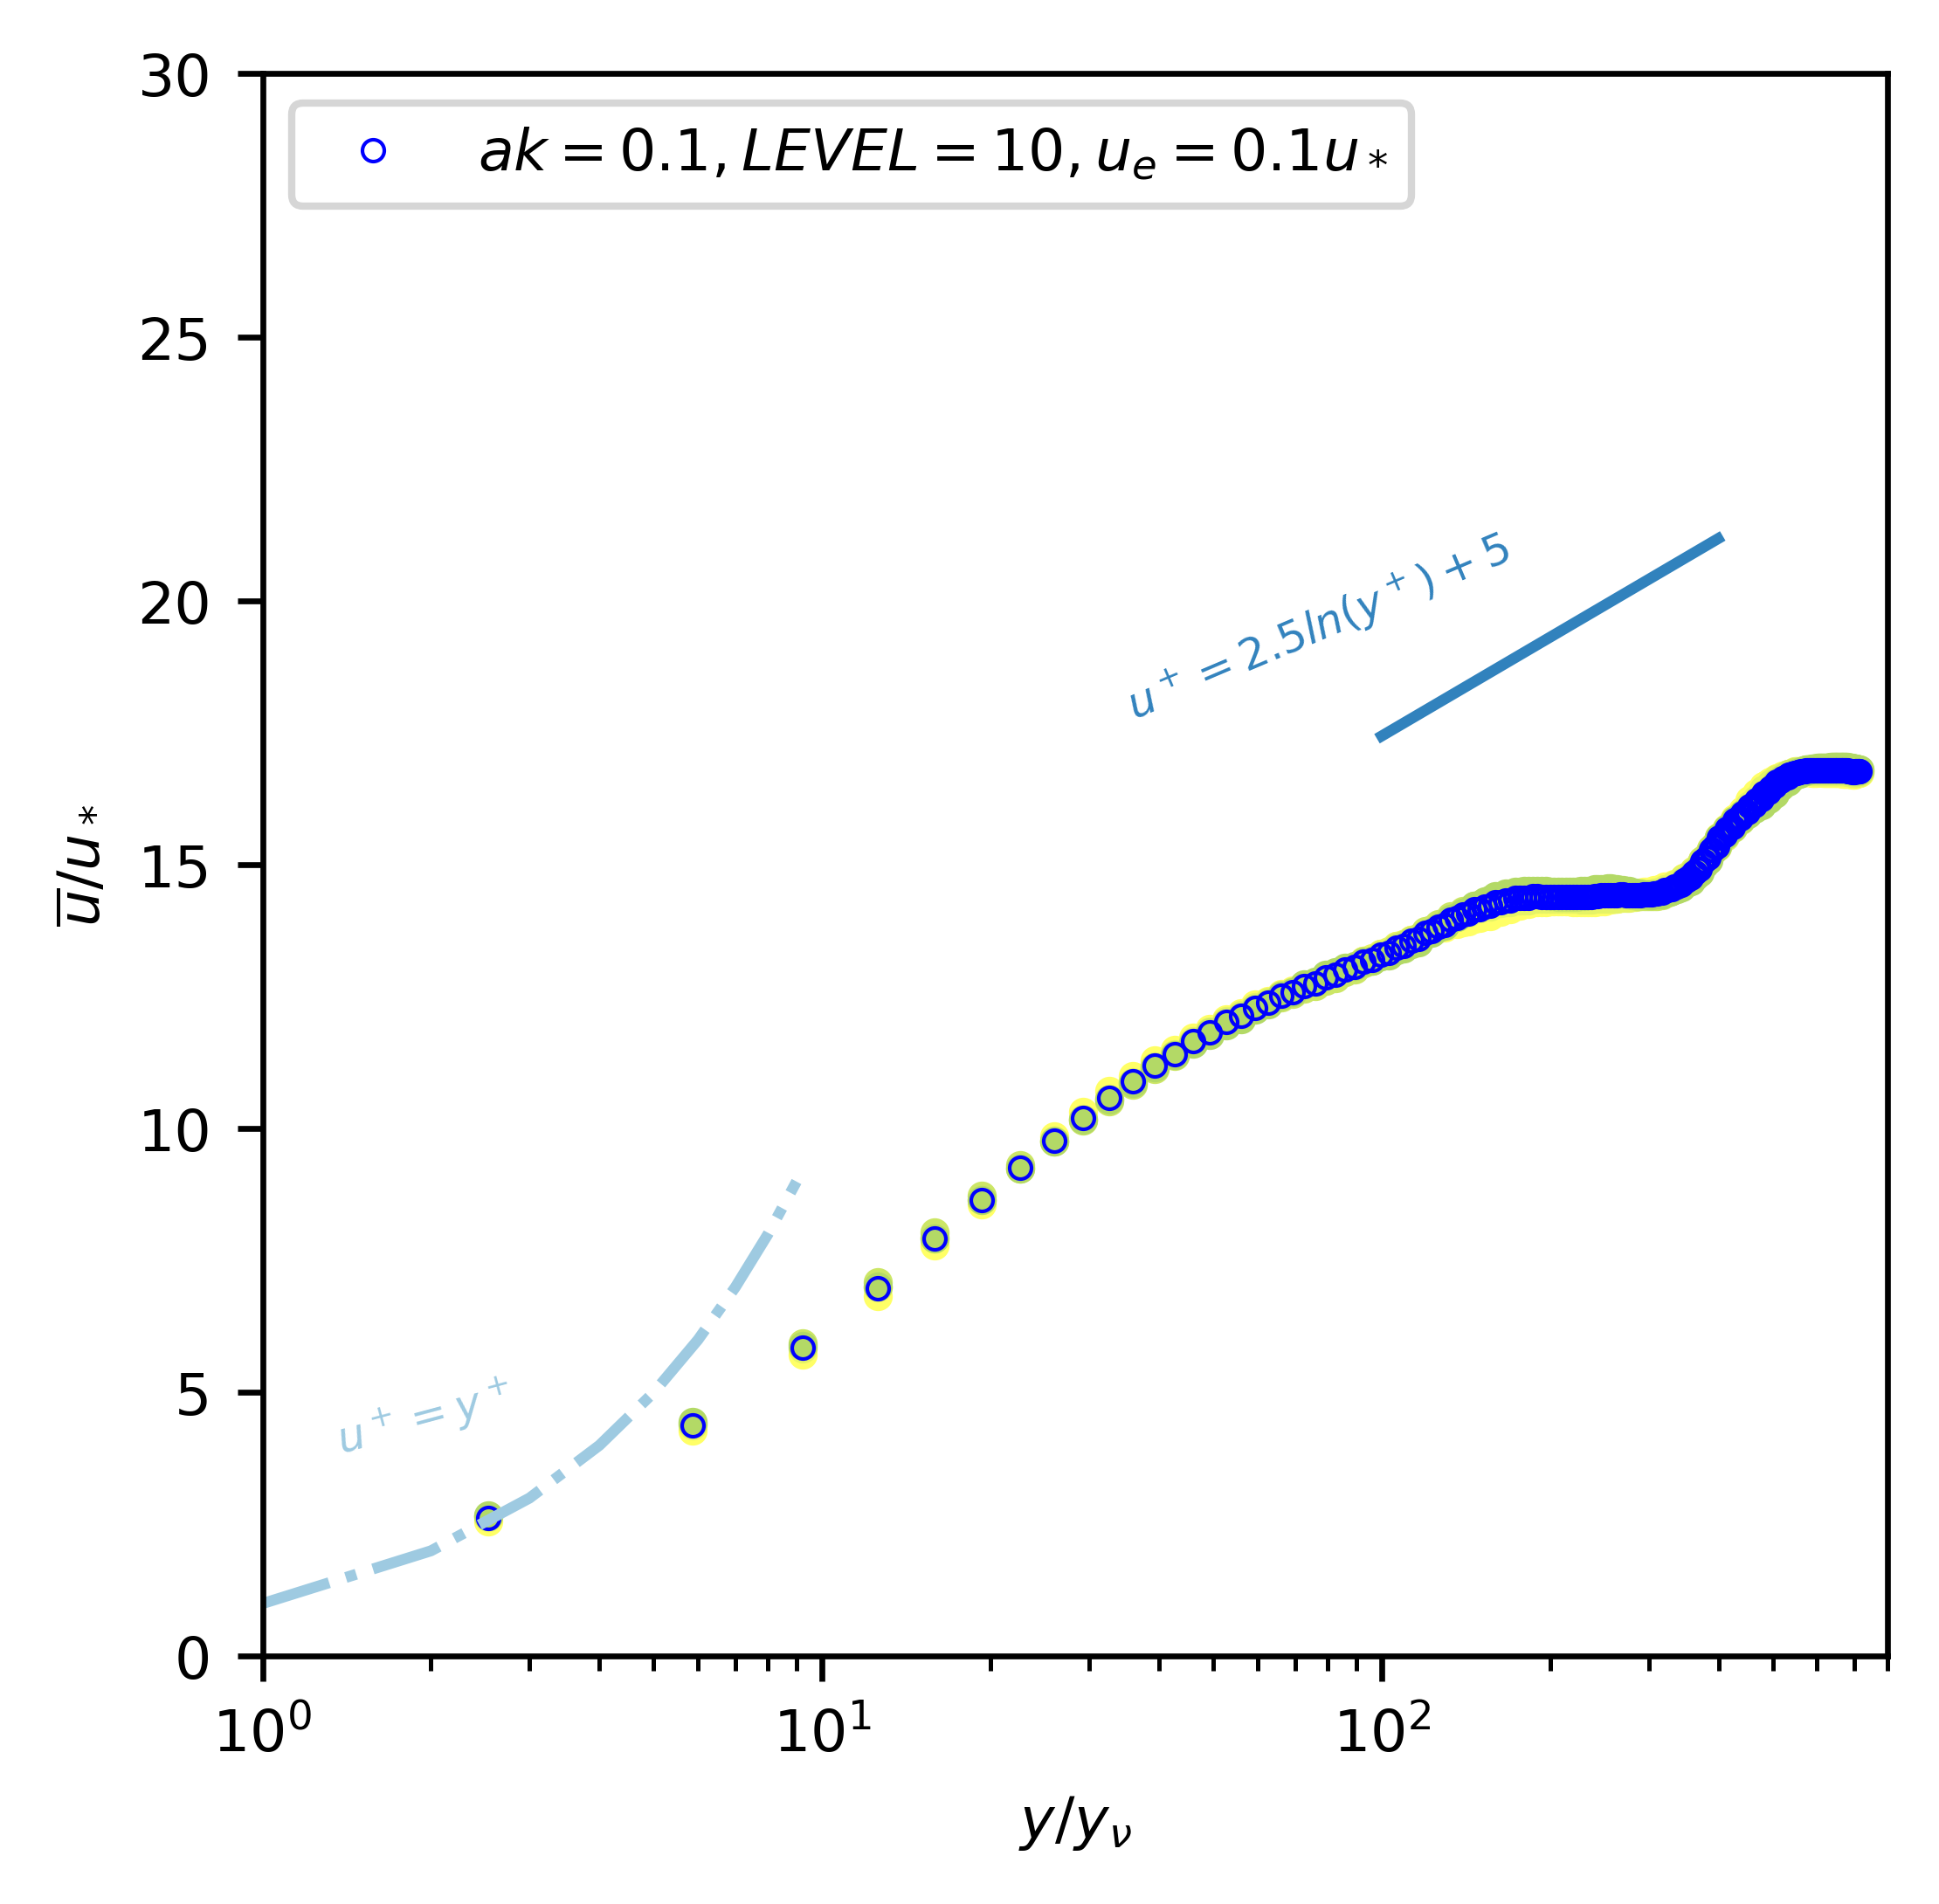

In [288]:
# """Plot the average water profile for the STATIONARY wave cases."""

fig = plt.figure(figsize=[4,4]); ax = plt.gca()

"""The stationary wave case"""

# case = case4
# ytau = (2*np.pi-1)/case.Retau
# for i in range(0,13):
#     case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
#     plt.plot((case.yarray[31:-1:2]-1)/ytau, case.uxmean[i][31:-1:2]/case.ustar, '.', 
#              color=plt.cm.get_cmap('summer')(1-i/14))
# plt.plot((case.yarray[31:-1:2]-1)/ytau, np.average(case.uxmean, axis=0)[31:-1:2]/case.ustar, 
#          marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
#          label = r'$ak=%g, LEVEL=%g, u_e=%gu_*$' %(case.ak,case.LEVEL,case.emax), color='magenta') 

# case = case5
# ytau = (2*np.pi-1)/case.Retau
# for i in range(0,20):
#     case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
#     plt.plot((case.yarray[31:-1:2]-1)/ytau, case.uxmean[i][31:-1:2]/case.ustar, '.', 
#              color=plt.cm.get_cmap('summer')(1-i/20))
# plt.plot((case.yarray[31:-1:2]-1)/ytau, np.average(case.uxmean[:], axis=0)[31:-1:2]/case.ustar, 
#          marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
#          label = r'$ak=%g, LEVEL=%g, u_e=%gu_*$' %(case.ak,case.LEVEL,case.emax), color='darkviolet') 

case = case6
ytau = (2*np.pi-1)/case.Retau
for i in range(0,4):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
    plt.plot((case.yarray[31:-1:2]-1)/ytau, case.uxmean[i][31:-1:2]/case.ustar, '.', 
             color=plt.cm.get_cmap('summer')(1-i/10))
plt.plot((case.yarray[29:-1:2]-1)/ytau, np.average(case.uxmean, axis=0)[29:-1:2]/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, LEVEL=%g, u_e=%gu_*$' %(case.ak,case.LEVEL,case.emax), color='blue') 


y = np.arange(1,10)
plt.plot(y, y, '-.', color=plt.get_cmap('tab20c')(2))
y = np.arange(100,400)
plt.plot(y, 1/0.37*np.log(y)+5, color=plt.get_cmap('tab20c')(0))
# plt.plot(y, 1/0.41*np.log(y)+6, color=plt.get_cmap('tab20c')(0))
ax.text(0.1, 0.15, r'$u^+=y^+$', ha='center', va='center', rotation=15., fontsize=6, 
        color=plt.get_cmap('tab20c')(2), transform=ax.transAxes)
ax.text(0.65, 0.65, r'$u^+=2.5ln(y^+)+5$', ha='center', va='center', rotation=23, fontsize=6,
        color=plt.get_cmap('tab20c')(0), transform=ax.transAxes)
plt.xscale('log')
plt.ylim([0, 30])
plt.xlim([1, 800])
plt.ylabel(r'$\overline{u}/u_*$') 
plt.xlabel(r'$y/y_{\nu}$') 
plt.legend(loc='upper left')
# fig.savefig('/home/jiarong/Downloads/ICTAM/loglaw_g1.pdf')

In [ ]:
fig = plt.figure(figsize=[4,4]); ax = plt.gca()

"""The moving wave cases."""

case = case1
ytau = (2*np.pi-1)/case.Retau
for i in range(0,20):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[31:-1:2]-1)/ytau, (np.average(case.uxmean[:], axis=0)[31:-1:2])/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='magenta') 

case = case2
ytau = (2*np.pi-1)/case.Retau
for i in range(0,27):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[29:-1:2]-1)/ytau, (np.average(case.uxmean, axis=0)[29:-1:2])/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='darkviolet') 

case = case3
ytau = (2*np.pi-1)/case.Retau
case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[29:-1:2]-1)/ytau, (np.average(case.uxmean, axis=0)[29:-1:2])/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='blue') 

# y = np.arange(1,10)
# plt.plot(y, y, '-.', color=plt.get_cmap('tab20c')(2))
y = np.arange(100,400)
plt.plot(y, 1/0.4*np.log(y)+5, color=plt.get_cmap('tab20c')(0))
plt.xscale('log')
plt.ylim([0, 25])
plt.xlim([1, 690])
ax.annotate(r'$y/y_{\nu}$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction')
ax.set_ylabel(r'$U/u_*$') 
plt.legend(loc='upper left')

"""Plot where the mean profile changes"""
guess = 120
plt.plot(np.ones(100)*case.yarray[guess]/ytau, np.linspace(0,18,100), '--', color='gray', alpha=.5)
guess = 80
plt.plot(np.ones(100)*case.yarray[guess]/ytau, np.linspace(0,18,100), '--', color='gray', alpha=.5)

"""Plot where ak is"""
guess = 120
plt.plot(np.ones(100)*case.ak/case.k/ytau, np.linspace(0,6,100), '--', color='gray', alpha=.5)

"""Plot the mean gradient"""
start = 83
def draw_gradient (case, cchoice):
    ux_simu = (np.average(case.uxmean, axis=0)[start:-1])/case.ustar
    ux_smooth = butter_lowpass_filter(ux_simu, CUT=32, N=512)
    # plt.plot((case.yarray[start:-1]-1)/ytau, ux_simu)
    plt.plot((case.yarray[start:-1]-1)/ytau, ux_smooth, color=cchoice, alpha=0.5)
    quant = np.gradient(ux_smooth)/(case.L0/case.N)/(ux_smooth-case.wave.c)/case.k
    plt.plot((case.yarray[start:-1]-1)/ytau, quant, '--', color=cchoice, alpha = 0.5)
#     quant = np.gradient(ux_smooth)/(case.L0/case.N)/(ux_smooth)/case.k
#     plt.plot((case.yarray[start:-1]-1)/ytau, quant, '--', color=cchoice, alpha = 0.5)
    plt.plot((case.yarray[start:-1]-1)/ytau, (case.yarray[start:-1]-1)*case.k/case.ustar, color='gray', alpha=0.5)
    # plt.plot((case.yarray[start:-1]-1)/ytau, np.gradient(ux_smooth)/(case.L0/case.N)/5)

draw_gradient(case1, cchoice = 'magenta')
draw_gradient(case2, cchoice = 'darkviolet')
draw_gradient(case3, cchoice = 'blue')

ax.text(0.8, 0.05, r'$|U(y)^{\prime}/kU||$', ha='center', va='center', fontsize=6, 
        color=cchoice, transform=ax.transAxes)
ax.text(0.83, 0.85, r'$ky$', ha='center', va='center', fontsize=6, 
        color='gray', transform=ax.transAxes)
# ax.text(0.1, 0.15, r'$u^+=y^+$', ha='center', va='center', rotation=15., fontsize=6, 
#         color=plt.get_cmap('tab20c')(2), transform=ax.transAxes)
# ax.text(0.65, 0.65, r'$u^+=2.5ln(y^+)+5$', ha='center', va='center', rotation=23, fontsize=6,
#         color=plt.get_cmap('tab20c')(0), transform=ax.transAxes)

"""Roughness length"""
y = np.arange(0.01,400)
plt.plot(y, 1/0.4*np.log(y)+1, color='green', alpha=0.5)
ax.annotate(r'$z_0$', xy=(0.2,0.05), ha='left', va='top', xycoords='axes fraction', color='green')

def forward(x):
    return x*ytau*case.k
def back(x):
    return x/case.k/ytau

secax_x2 = ax.secondary_xaxis(-0.1, functions=(forward, back))
ax.annotate(r'$yk$', xy=(1, -0.1), ha='left', va='top', xycoords='axes fraction')

For the middle case
Ui = 5/6u*
Um = 7u*
c = 4u*

In [260]:
ratioi = 5
ratiom = 7

beta = 2*((ratiom-4)/(ratioi-4))**4*(2-4/ratioi)
print(beta)
import math
phi = math.atan(-(1/ratiom)**2*beta)
print(math.degrees(phi))

194.4
-75.85285266958815


Text(1, -0.1, '$yk$')

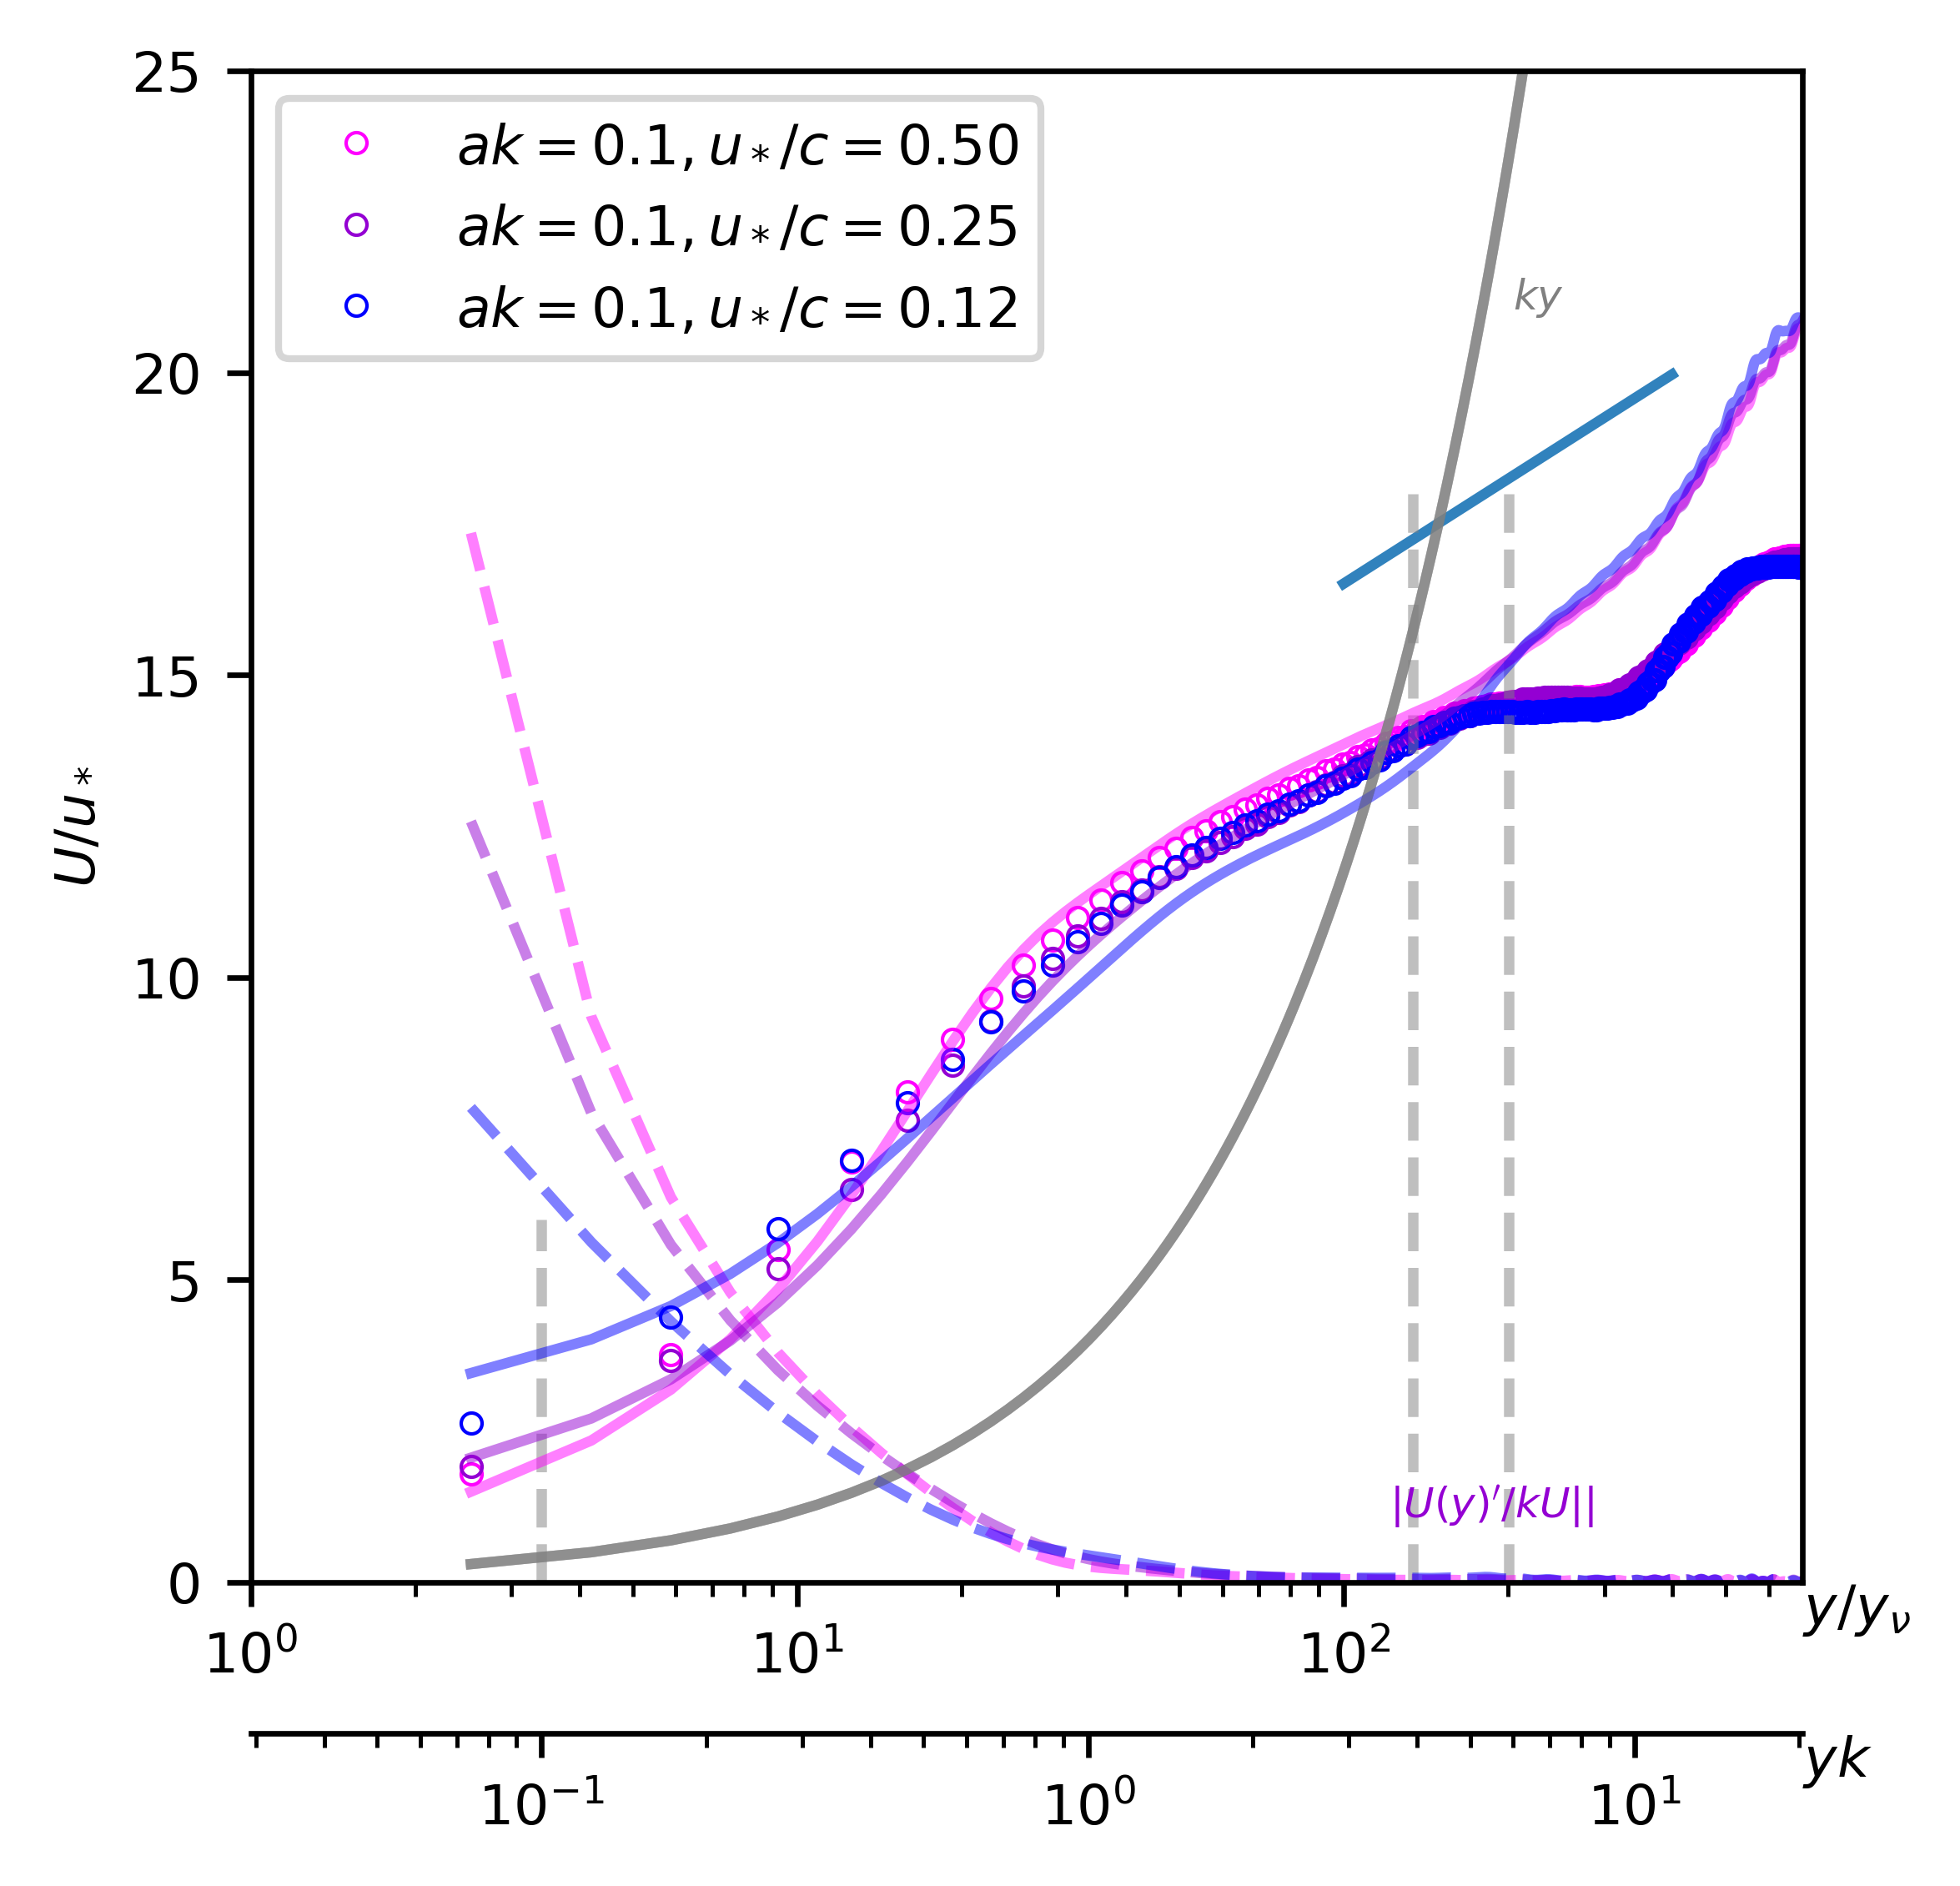

In [289]:
fig = plt.figure(figsize=[4,4]); ax = plt.gca()

"""The moving wave cases."""

case = case4
ytau = (2*np.pi-1)/case.Retau
for i in range(0,20):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[31:-1:2]-1)/ytau, (np.average(case.uxmean[:], axis=0)[31:-1:2])/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='magenta') 

case = case5
ytau = (2*np.pi-1)/case.Retau
for i in range(0,27):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[29:-1:2]-1)/ytau, (np.average(case.uxmean, axis=0)[29:-1:2])/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='darkviolet') 

case = case6
ytau = (2*np.pi-1)/case.Retau
case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[29:-1:2]-1)/ytau, (np.average(case.uxmean, axis=0)[29:-1:2])/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='blue') 

# y = np.arange(1,10)
# plt.plot(y, y, '-.', color=plt.get_cmap('tab20c')(2))
y = np.arange(100,400)
plt.plot(y, 1/0.4*np.log(y)+5, color=plt.get_cmap('tab20c')(0))
plt.xscale('log')
plt.ylim([0, 25])
plt.xlim([1, 690])
ax.annotate(r'$y/y_{\nu}$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction')
ax.set_ylabel(r'$U/u_*$') 
plt.legend(loc='upper left')

"""Plot where the mean profile changes"""
guess = 120
plt.plot(np.ones(100)*case.yarray[guess]/ytau, np.linspace(0,18,100), '--', color='gray', alpha=.5)
guess = 80
plt.plot(np.ones(100)*case.yarray[guess]/ytau, np.linspace(0,18,100), '--', color='gray', alpha=.5)

"""Plot where ak is"""
guess = 120
plt.plot(np.ones(100)*case.ak/case.k/ytau, np.linspace(0,6,100), '--', color='gray', alpha=.5)

"""Plot the mean gradient"""
start = 83
def draw_gradient (case, cchoice):
    ux_simu = (np.average(case.uxmean, axis=0)[start:-1])/case.ustar
    ux_smooth = butter_lowpass_filter(ux_simu, CUT=32, N=512)
    # plt.plot((case.yarray[start:-1]-1)/ytau, ux_simu)
    plt.plot((case.yarray[start:-1]-1)/ytau, ux_smooth, color=cchoice, alpha=0.5)
    quant = np.gradient(ux_smooth)/(case.L0/case.N)/(ux_smooth-case.wave.c)/case.k
    plt.plot((case.yarray[start:-1]-1)/ytau, quant, '--', color=cchoice, alpha = 0.5)
    plt.plot((case.yarray[start:-1]-1)/ytau, (case.yarray[start:-1]-1)*case.k/case.ustar, color='gray', alpha=0.5)
    # plt.plot((case.yarray[start:-1]-1)/ytau, np.gradient(ux_smooth)/(case.L0/case.N)/5)

draw_gradient(case1, cchoice = 'magenta')
draw_gradient(case2, cchoice = 'darkviolet')
draw_gradient(case3, cchoice = 'blue')

ax.text(0.8, 0.05, r'$|U(y)^{\prime}/kU||$', ha='center', va='center', fontsize=6, 
        color=cchoice, transform=ax.transAxes)
ax.text(0.83, 0.85, r'$ky$', ha='center', va='center', fontsize=6, 
        color='gray', transform=ax.transAxes)
# ax.text(0.1, 0.15, r'$u^+=y^+$', ha='center', va='center', rotation=15., fontsize=6, 
#         color=plt.get_cmap('tab20c')(2), transform=ax.transAxes)
# ax.text(0.65, 0.65, r'$u^+=2.5ln(y^+)+5$', ha='center', va='center', rotation=23, fontsize=6,
#         color=plt.get_cmap('tab20c')(0), transform=ax.transAxes)

"""Roughness length"""
# y = np.arange(0.01,400)
# plt.plot(y, 1/0.4*np.log(y)+1, color='green', alpha=0.5)
# ax.annotate(r'$z_0$', xy=(0.2,0.05), ha='left', va='top', xycoords='axes fraction', color='green')

def forward(x):
    return x*ytau*case.k
def back(x):
    return x/case.k/ytau

secax_x2 = ax.secondary_xaxis(-0.1, functions=(forward, back))
ax.annotate(r'$yk$', xy=(1, -0.1), ha='left', va='top', xycoords='axes fraction')

Text(1, -0.1, '$yk$')

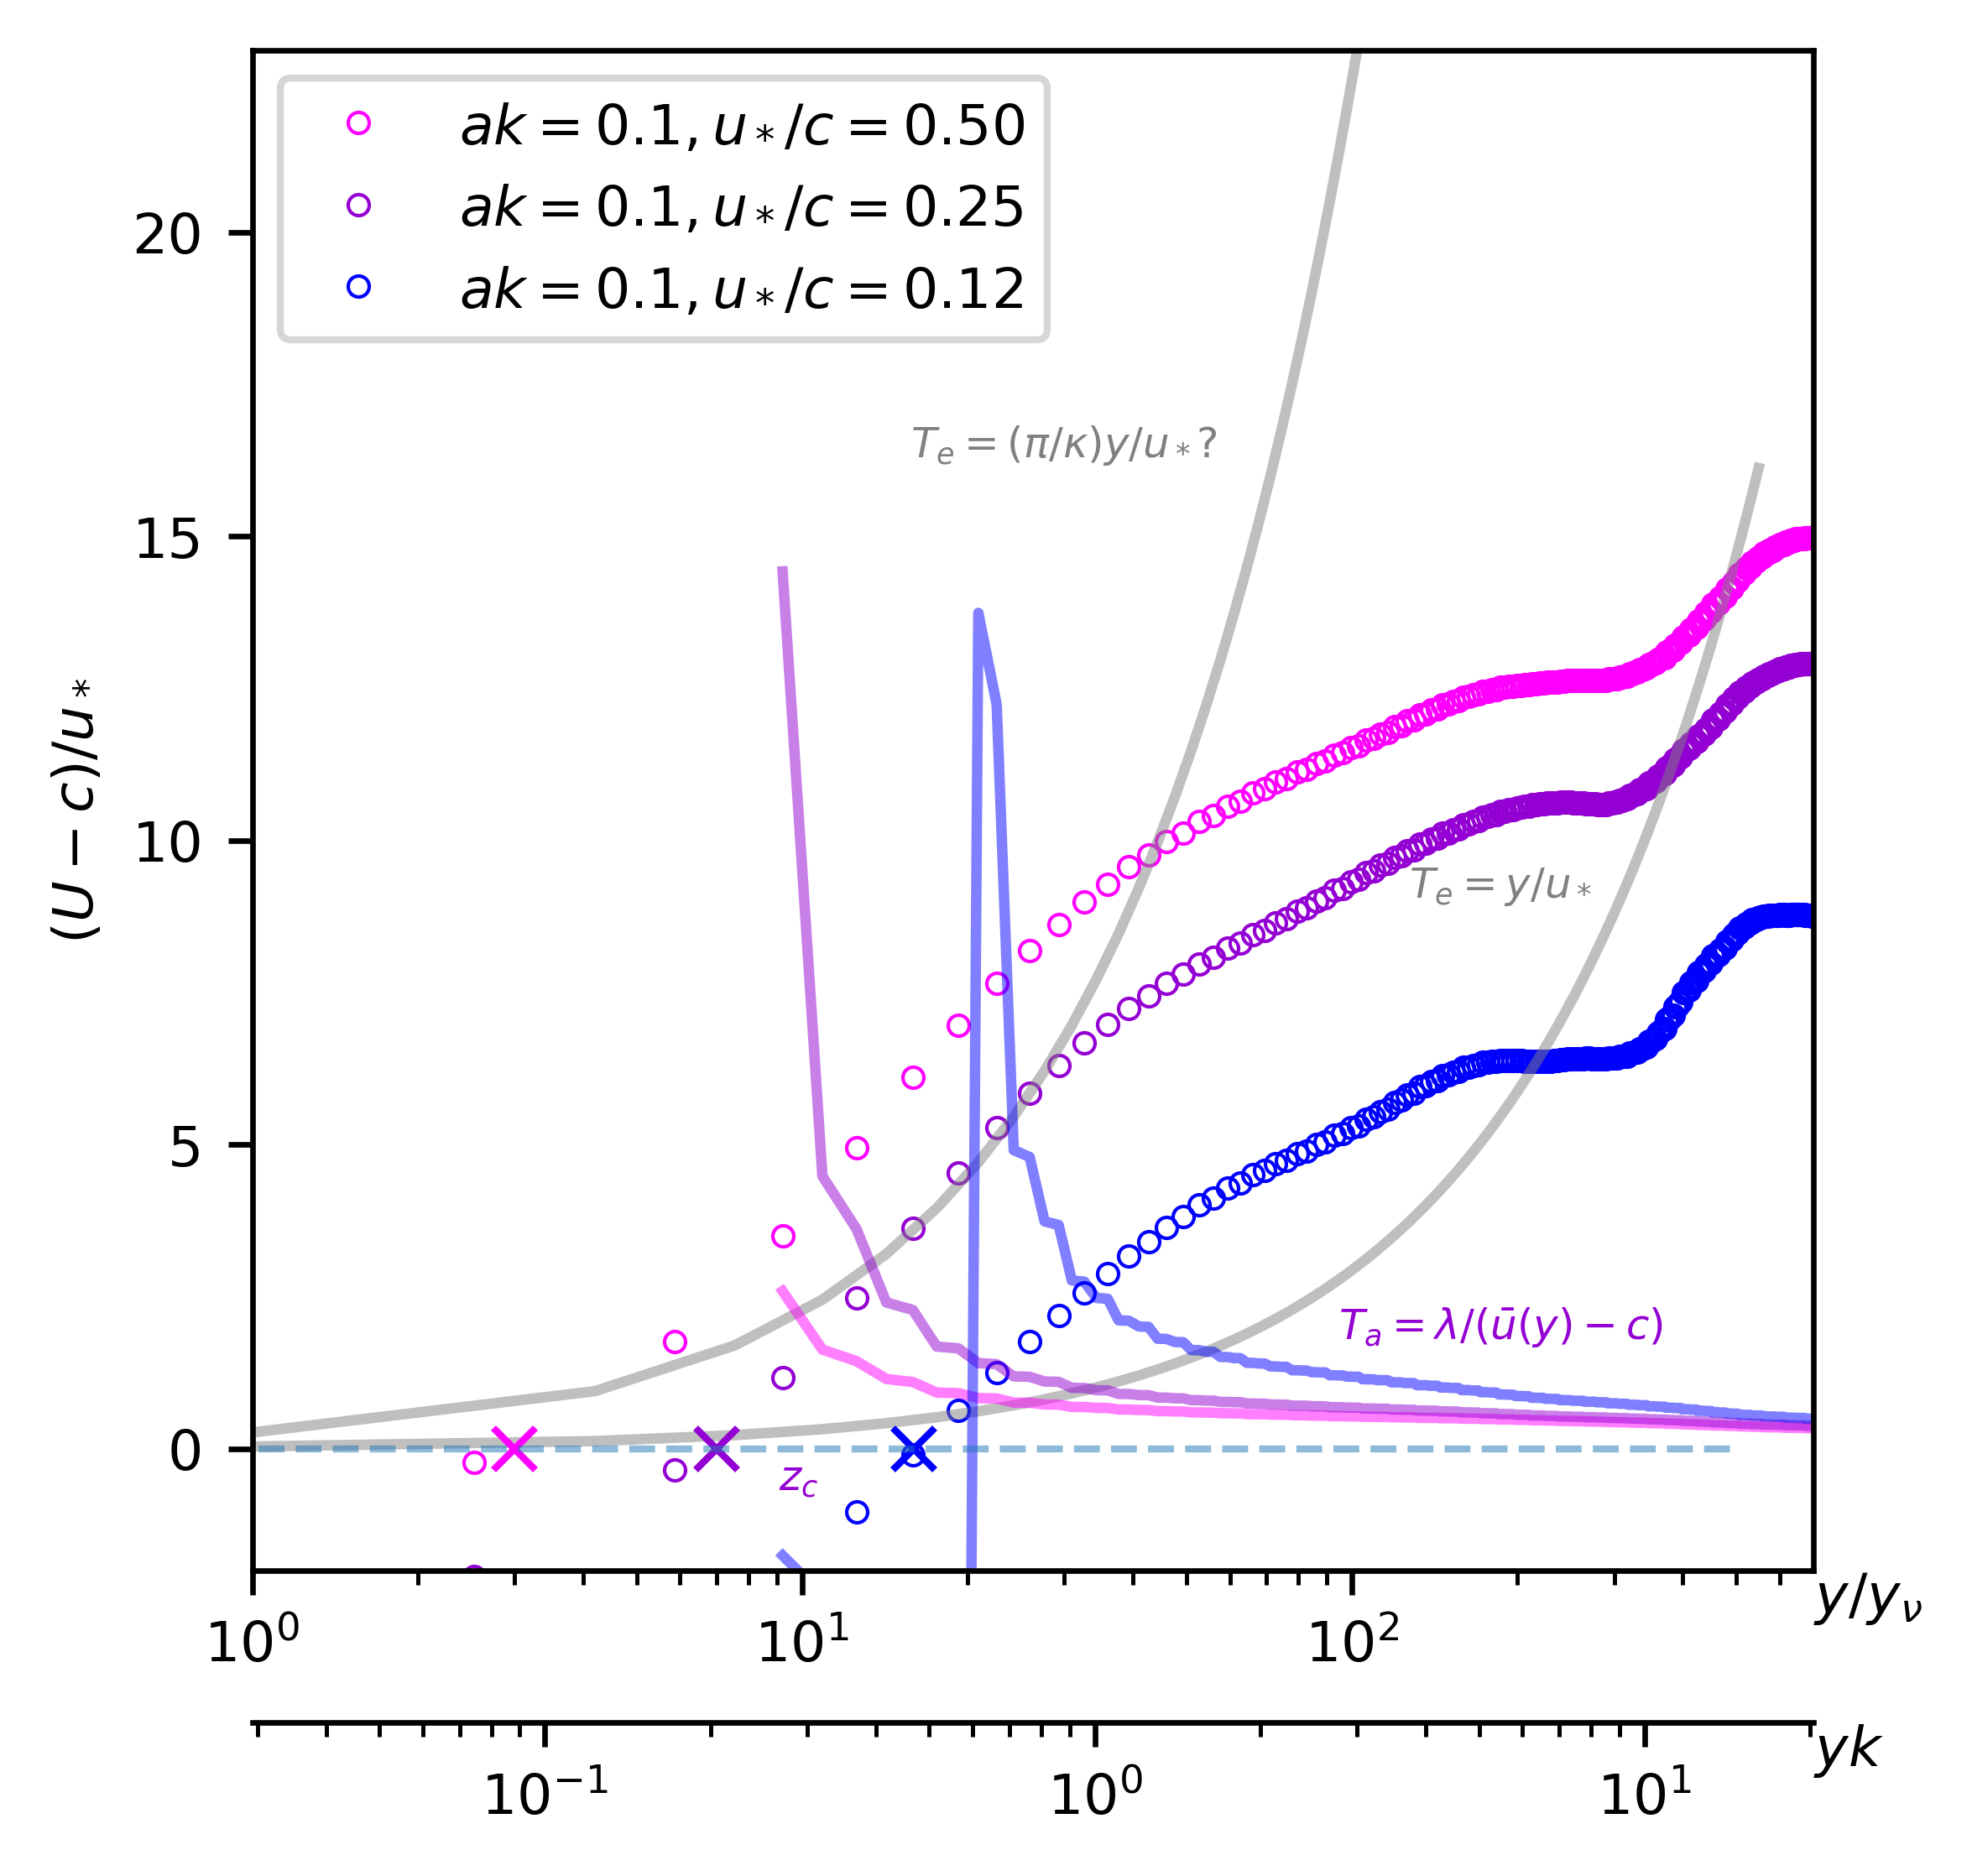

In [274]:
"""Make plots for the other ones too"""
# """Plot the average water profile for the STATIONARY wave cases."""

fig = plt.figure(figsize=[4,4]); ax = plt.gca()

"""The moving wave cases."""

case = case4
ytau = (2*np.pi-1)/case.Retau
for i in range(0,20):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[31:-1:2]-1)/ytau, (np.average(case.uxmean[:], axis=0)[31:-1:2]-case.wave.c)/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='magenta') 

case = case5
ytau = (2*np.pi-1)/case.Retau
for i in range(0,27):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[29:-1:2]-1)/ytau, (np.average(case.uxmean, axis=0)[29:-1:2]-case.wave.c)/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='darkviolet') 

case = case6
ytau = (2*np.pi-1)/case.Retau
case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
plt.plot((case.yarray[29:-1:2]-1)/ytau, (np.average(case.uxmean, axis=0)[29:-1:2]-case.wave.c)/case.ustar, 
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, u_*/c=%.2f$' %(case.ak,case.ustar/case.wave.c), color='blue') 

"""Plot a few quantities"""
plt.plot((case.yarray[80:-100:2]-1)/ytau, (case.yarray[80:-100:2]-1)/case.ustar*np.pi/0.41, color='gray', alpha=0.5)
plt.plot((case.yarray[80:-100:2]-1)/ytau, (case.yarray[80:-100:2]-1)/case.ustar, color='gray', alpha=0.5)
# plt.plot((case.yarray[80:-1:2]-1)/ytau, (case.yarray[80:-1:2]-1)/np.average(case.uxmean, axis=0)[80:-1:2], color='gray', alpha=0.5)
start = 87
plt.plot((case.yarray[start:-1]-1)/ytau, 2*np.pi/((np.average(case1.uxmean, axis=0)[start:-1]-case1.wave.c)*case.k), color='magenta', alpha=0.5)
plt.plot((case.yarray[start:-1]-1)/ytau, 2*np.pi/((np.average(case2.uxmean, axis=0)[start:-1]-case2.wave.c)*case.k), color='darkviolet', alpha=0.5)
plt.plot((case.yarray[start:-1]-1)/ytau, 2*np.pi/((np.average(case2.uxmean, axis=0)[start:-1]-case3.wave.c)*case.k), color='blue', alpha=0.5)

# y = np.arange(1,10)
# plt.plot(y, y, '-.', color=plt.get_cmap('tab20c')(2))
# y = np.arange(100,400)
# plt.plot(y, 1/0.37*np.log(y)+5, color=plt.get_cmap('tab20c')(0))
# # plt.plot(y, 1/0.41*np.log(y)+6, color=plt.get_cmap('tab20c')(0))
ax.text(0.8, 0.45, r'$T_e = y/u_*$', ha='center', va='center', rotation=0, fontsize=6,
        color='gray', transform=ax.transAxes)
ax.text(0.52, 0.74, r'$T_e = (\pi/\kappa)y/u_* ?$', ha='center', va='center', rotation=0, fontsize=6,
        color='gray', transform=ax.transAxes)
"""Which is the def of eddy turnover time"""
# ax.text(0.8, 0.35, r'$T_e = y/\bar{u}(y)$', ha='center', va='center', rotation=0, fontsize=6,
#         color='gray', transform=ax.transAxes)
ax.text(0.8, 0.16, r'$T_a = \lambda/(\bar{u}(y)-c)$', ha='center', va='center', rotation=0, fontsize=6,
        color='darkviolet', transform=ax.transAxes)
ax.text(0.35, 0.06, r'$z_c$', ha='center', va='center', rotation=0, fontsize=6,
        color='darkviolet', transform=ax.transAxes)

plt.xscale('log')
plt.ylim([-2, 23])
plt.xlim([1, 690])
plt.ylabel(r'$(U-c)/u_*$') 
ax.annotate(r'$y/y_{\nu}$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction')
plt.legend(loc='upper left')

"""Indicate the critical layer"""
plt.plot((3), (0), 'x', color='magenta')
plt.plot((7), (0), 'x', color='darkviolet')
plt.plot((16), (0), 'x', color='blue')
plt.plot(np.arange(0,500), np.zeros(500), '--', alpha=0.5, lw=1)

def forward(x):
    return x*ytau*case.k
def back(x):
    return x/case.k/ytau

secax_x2 = ax.secondary_xaxis(-0.1, functions=(forward, back))
ax.annotate(r'$yk$', xy=(1, -0.1), ha='left', va='top', xycoords='axes fraction')


In [ ]:
"""Time averaging and x averaging: visualization"""
fig = plt.figure(figsize=[4,3])
case = case2
# ux_tmean = np.average(case.ux, axis=0) # Time average of the 2D
# uy_tmean = np.average(case.uy, axis=0) # Time average of the 2D

"""u instantaneous"""
# img = plt.imshow(np.rot90(case.uy[0]/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1) 
# plt.title(r'$u_z(x,z,t)$')
"""u bar (time average)"""
# img = plt.imshow(np.rot90(uy_tmean/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1)
# plt.title(r'$\bar{u}_z(x,z)$')
"""u prime"""
img = plt.imshow(np.rot90(case.uy[0]/0.25)-np.rot90(uy_tmean/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 1, vmin = -1) 
plt.title(r'$u_z^{\prime}(x,z,t)$')


ux_txmean = np.tile(np.average(ux_tmean, axis=0), (case.N,1)) # axis 0 is x, axis 1 is z
uy_txmean = np.tile(np.average(uy_tmean, axis=0), (case.N,1))

"""<u bar>"""
# img = plt.imshow(np.rot90(uy_txmean)/0.25, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1) 
# plt.title(r'$\langle\bar{u}_z\rangle(z)$')

"""u tilde"""
# img = plt.imshow(np.rot90(uy_tmean - uy_txmean)/0.25, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1) 
# plt.title(r'$\tilde{u}_z(x,z)$')

plt.axis('off')
L0 = 2*np.pi; NGRID = 512
xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
plt.plot(xarray, case.eta[0], c='k', lw=1)

In [19]:
# """Compute the Reynolds stress"""

# def field_uvprime (case, t, ux_tmean, uy_tmean):
#     """Return 3D ux'uy' already averaged over spanwise"""
#     working_dir = case.path
#     ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
#     uy_3D = {'name':'uy', 'value':[]}
#     f_3D = {'name':'f', 'value':[]}
#     for field in (ux_3D,uy_3D,f_3D):           
#         picklename = working_dir + 'field/'+field['name']+'_t%g' % t +'.pkl'
#         exists = os.path.exists(picklename)
#         # If the pickle is there read in the pickles
#         if exists:
#             field['value'] = load_object(picklename)
#         else:
#             print('pickle not restored!')
#     uxuy_prime = np.average((ux_3D['value']-ux_tmean)*(uy_3D['value']-uy_tmean), axis=0)
#     del(ux_3D, uy_3D, f_3D)
#     gc.collect()
#     return uxuy_prime

# def field_tmeanadd (case, t, ux_tmean, uy_tmean):
#     """Return additive 3D field to compute the time mean"""
#     working_dir = case.path
#     ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
#     uy_3D = {'name':'uy', 'value':[]}
#     f_3D = {'name':'f', 'value':[]}
#     for field in (ux_3D,uy_3D,f_3D):           
#         picklename = working_dir + 'field/'+field['name']+'_t%g' % t +'.pkl'
#         exists = os.path.exists(picklename)
#         # If the pickle is there read in the pickles
#         if exists:
#             field['value'] = load_object(picklename)
#         else:
#             print('pickle not restored!')    
#     ux_tmean = ux_tmean + ux_3D['value']
#     uy_tmean = uy_tmean + uy_3D['value']
#     del(ux_3D, uy_3D, f_3D)
#     gc.collect()
#     return ux_tmean, uy_tmean

"""Compute the Reynolds stress"""

def field_uvprime (case, t, ux_tmean, uy_tmean):
    """Return 3D ux'uy' already averaged over spanwise"""
    working_dir = case.path
    ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
    uy_3D = {'name':'uy', 'value':[]}
    f_3D = {'name':'f', 'value':[]}
    for field in (ux_3D,uy_3D,f_3D):           
        picklename = working_dir + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % t +'.pkl'
        exists = os.path.exists(picklename)
        # If the pickle is there read in the pickles
        if exists:
            field['value'] = load_object(picklename)
        else:
            print('pickle not restored!')
    uxuy_prime = np.average((ux_3D['value']-ux_tmean)*(uy_3D['value']-uy_tmean), axis=0)
    del(ux_3D, uy_3D, f_3D)
    gc.collect()
    return uxuy_prime

def field_tmeanadd (case, t, ux_tmean, uy_tmean):
    """Return additive 3D field to compute the time mean"""
    working_dir = case.path
    ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
    uy_3D = {'name':'uy', 'value':[]}
    f_3D = {'name':'f', 'value':[]}
    for field in (ux_3D,uy_3D,f_3D):           
        picklename = working_dir + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % t +'.pkl'
        exists = os.path.exists(picklename)
        # If the pickle is there read in the pickles
        if exists:
            field['value'] = load_object(picklename)
        else:
            print('pickle not restored!')    
    ux_tmean = ux_tmean + ux_3D['value']
    uy_tmean = uy_tmean + uy_3D['value']
#     np.roll(case.ux[ti], -case.shift_index[ti], axis=0)*(1-np.roll(f, -case.shift_index[ti], axis=0))
    del(ux_3D, uy_3D, f_3D)
    gc.collect()
    return ux_tmean, uy_tmean

In [47]:
"""Computing time average."""
case = case1
bound = 9
ux_tmeanadd = np.zeros((255, case.N, case.N)) # Empty array of slice*512*512
uy_tmeanadd = np.zeros((255, case.N, case.N))
for i in tqdm(range(0,bound)):
    ux_tmeanadd, uy_tmeanadd = field_tmeanadd(case, case.tstat[i], ux_tmeanadd, uy_tmeanadd)

# ux_tmean = ux_tmeanadd/bound
# uy_tmean = uy_tmeanadd/bound
# Average over spanwise
ux_tmean = np.tile(np.average(ux_tmeanadd/bound, axis=0), (255,1,1))
uy_tmean = np.tile(np.average(uy_tmeanadd/bound, axis=0), (255,1,1))
del(ux_tmeanadd, uy_tmeanadd); gc.collect()

100%|██████████| 9/9 [01:47<00:00, 11.90s/it]


26

100%|██████████| 9/9 [01:42<00:00, 11.44s/it]
No handles with labels found to put in legend.


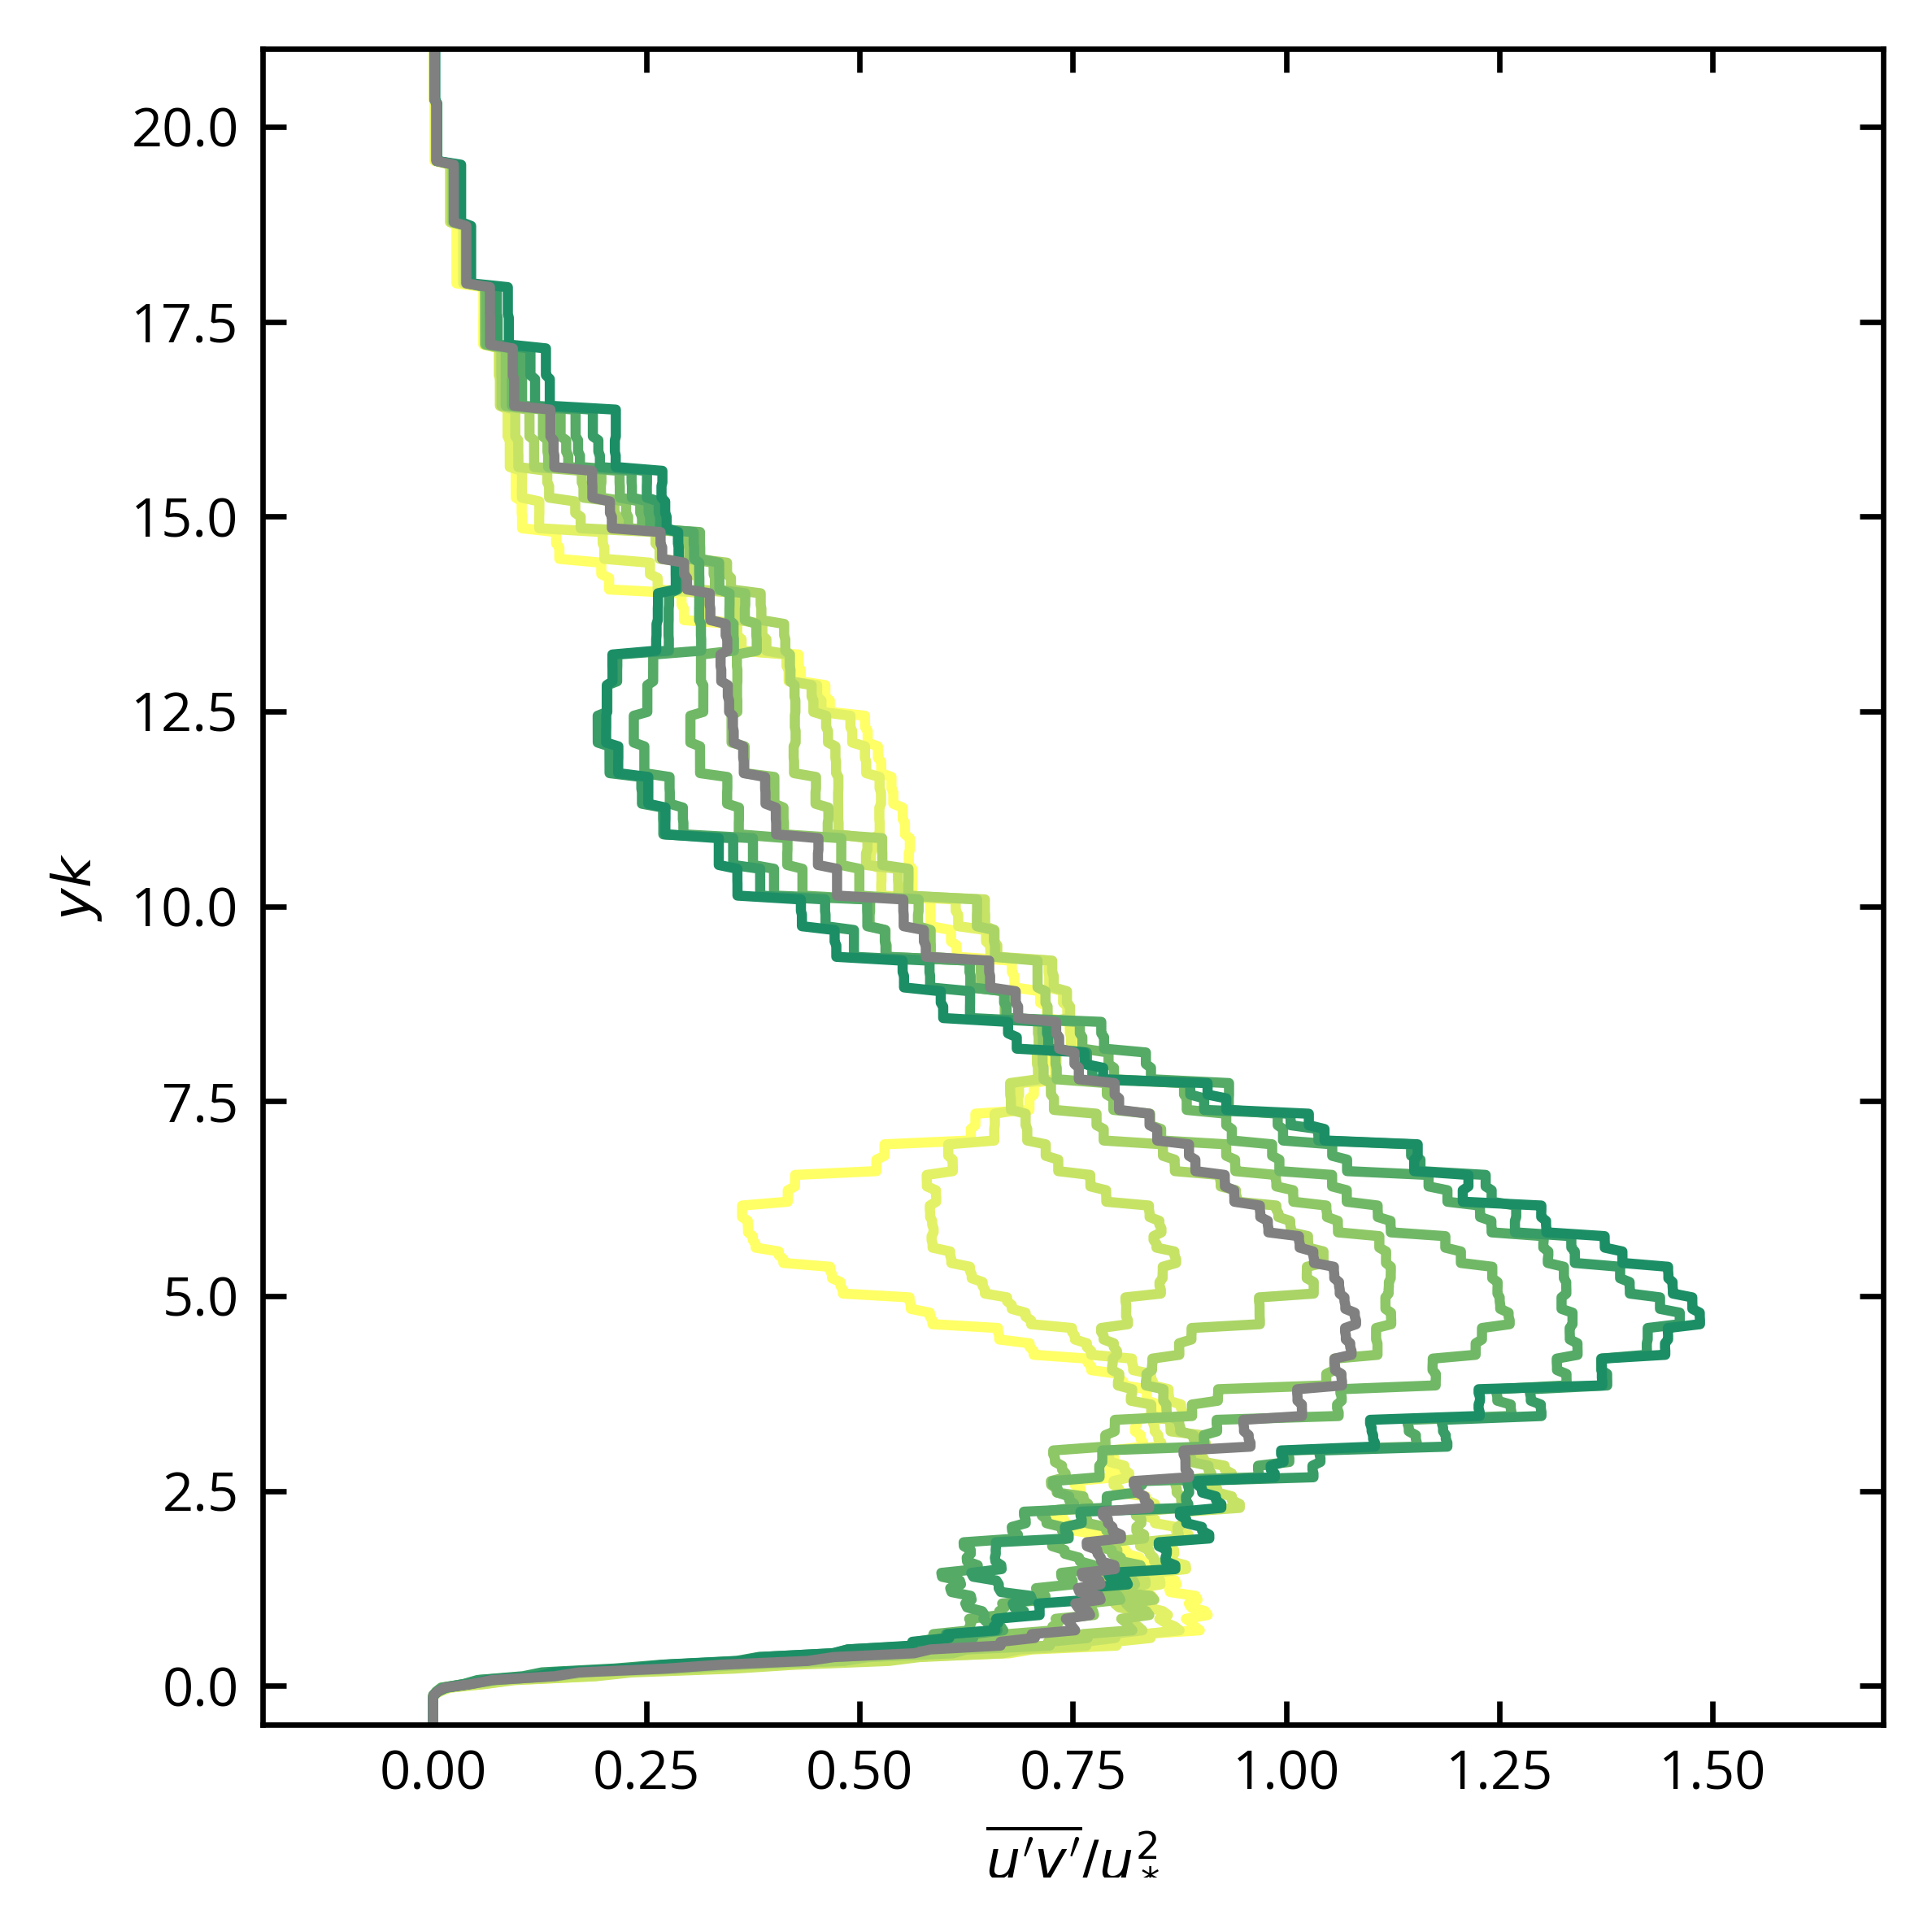

In [51]:
fig = plt.figure(figsize=[3,4])
uv_prime_add = np.zeros((512,512))
for i in tqdm(range(0,bound)):
    uv_prime = field_uvprime(case, case.tstat[i], ux_tmean, uy_tmean)
    plt.plot(np.average(-uv_prime, axis=0)/0.25**2, (case.yarray-1)*case.k,
             color=plt.cm.get_cmap('summer')(1-i/9))
    uv_prime_add += uv_prime
    
# ax.text(0.9, 0.35, r'$\lambda k$', ha='center', va='center', color='gray', transform=ax.transAxes)

plt.xlabel('$\overline{u^{\prime} v^{\prime}}/u_*^2$'); plt.ylabel(r'$yk$')
plt.legend()
plt.ylim([-0.5,21])
plt.xlim([-0.2,1.7])

uv_prime = np.copy(uv_prime_add/bound)
del(uv_prime_add); gc.collect()
plt.plot(np.average(-uv_prime, axis=0)/0.25**2, (case.yarray-1)*case.k,
         color='gray')

In [52]:
ux_txmean = np.tile(np.average(ux_tmean, axis=(0,1)), (255,case.N,1))
uy_txmean = np.tile(np.average(uy_tmean, axis=(0,1)), (255,case.N,1))
print(np.shape(ux_tmean))
print(np.shape(ux_txmean))

uv_tilde = (uy_tmean - uy_txmean)*(ux_tmean - ux_txmean)
print(np.shape(uv_tilde))
print(np.shape(uv_prime))

(255, 512, 512)
(255, 512, 512)
(255, 512, 512)
(512, 512)


(-0.2, 1.7)

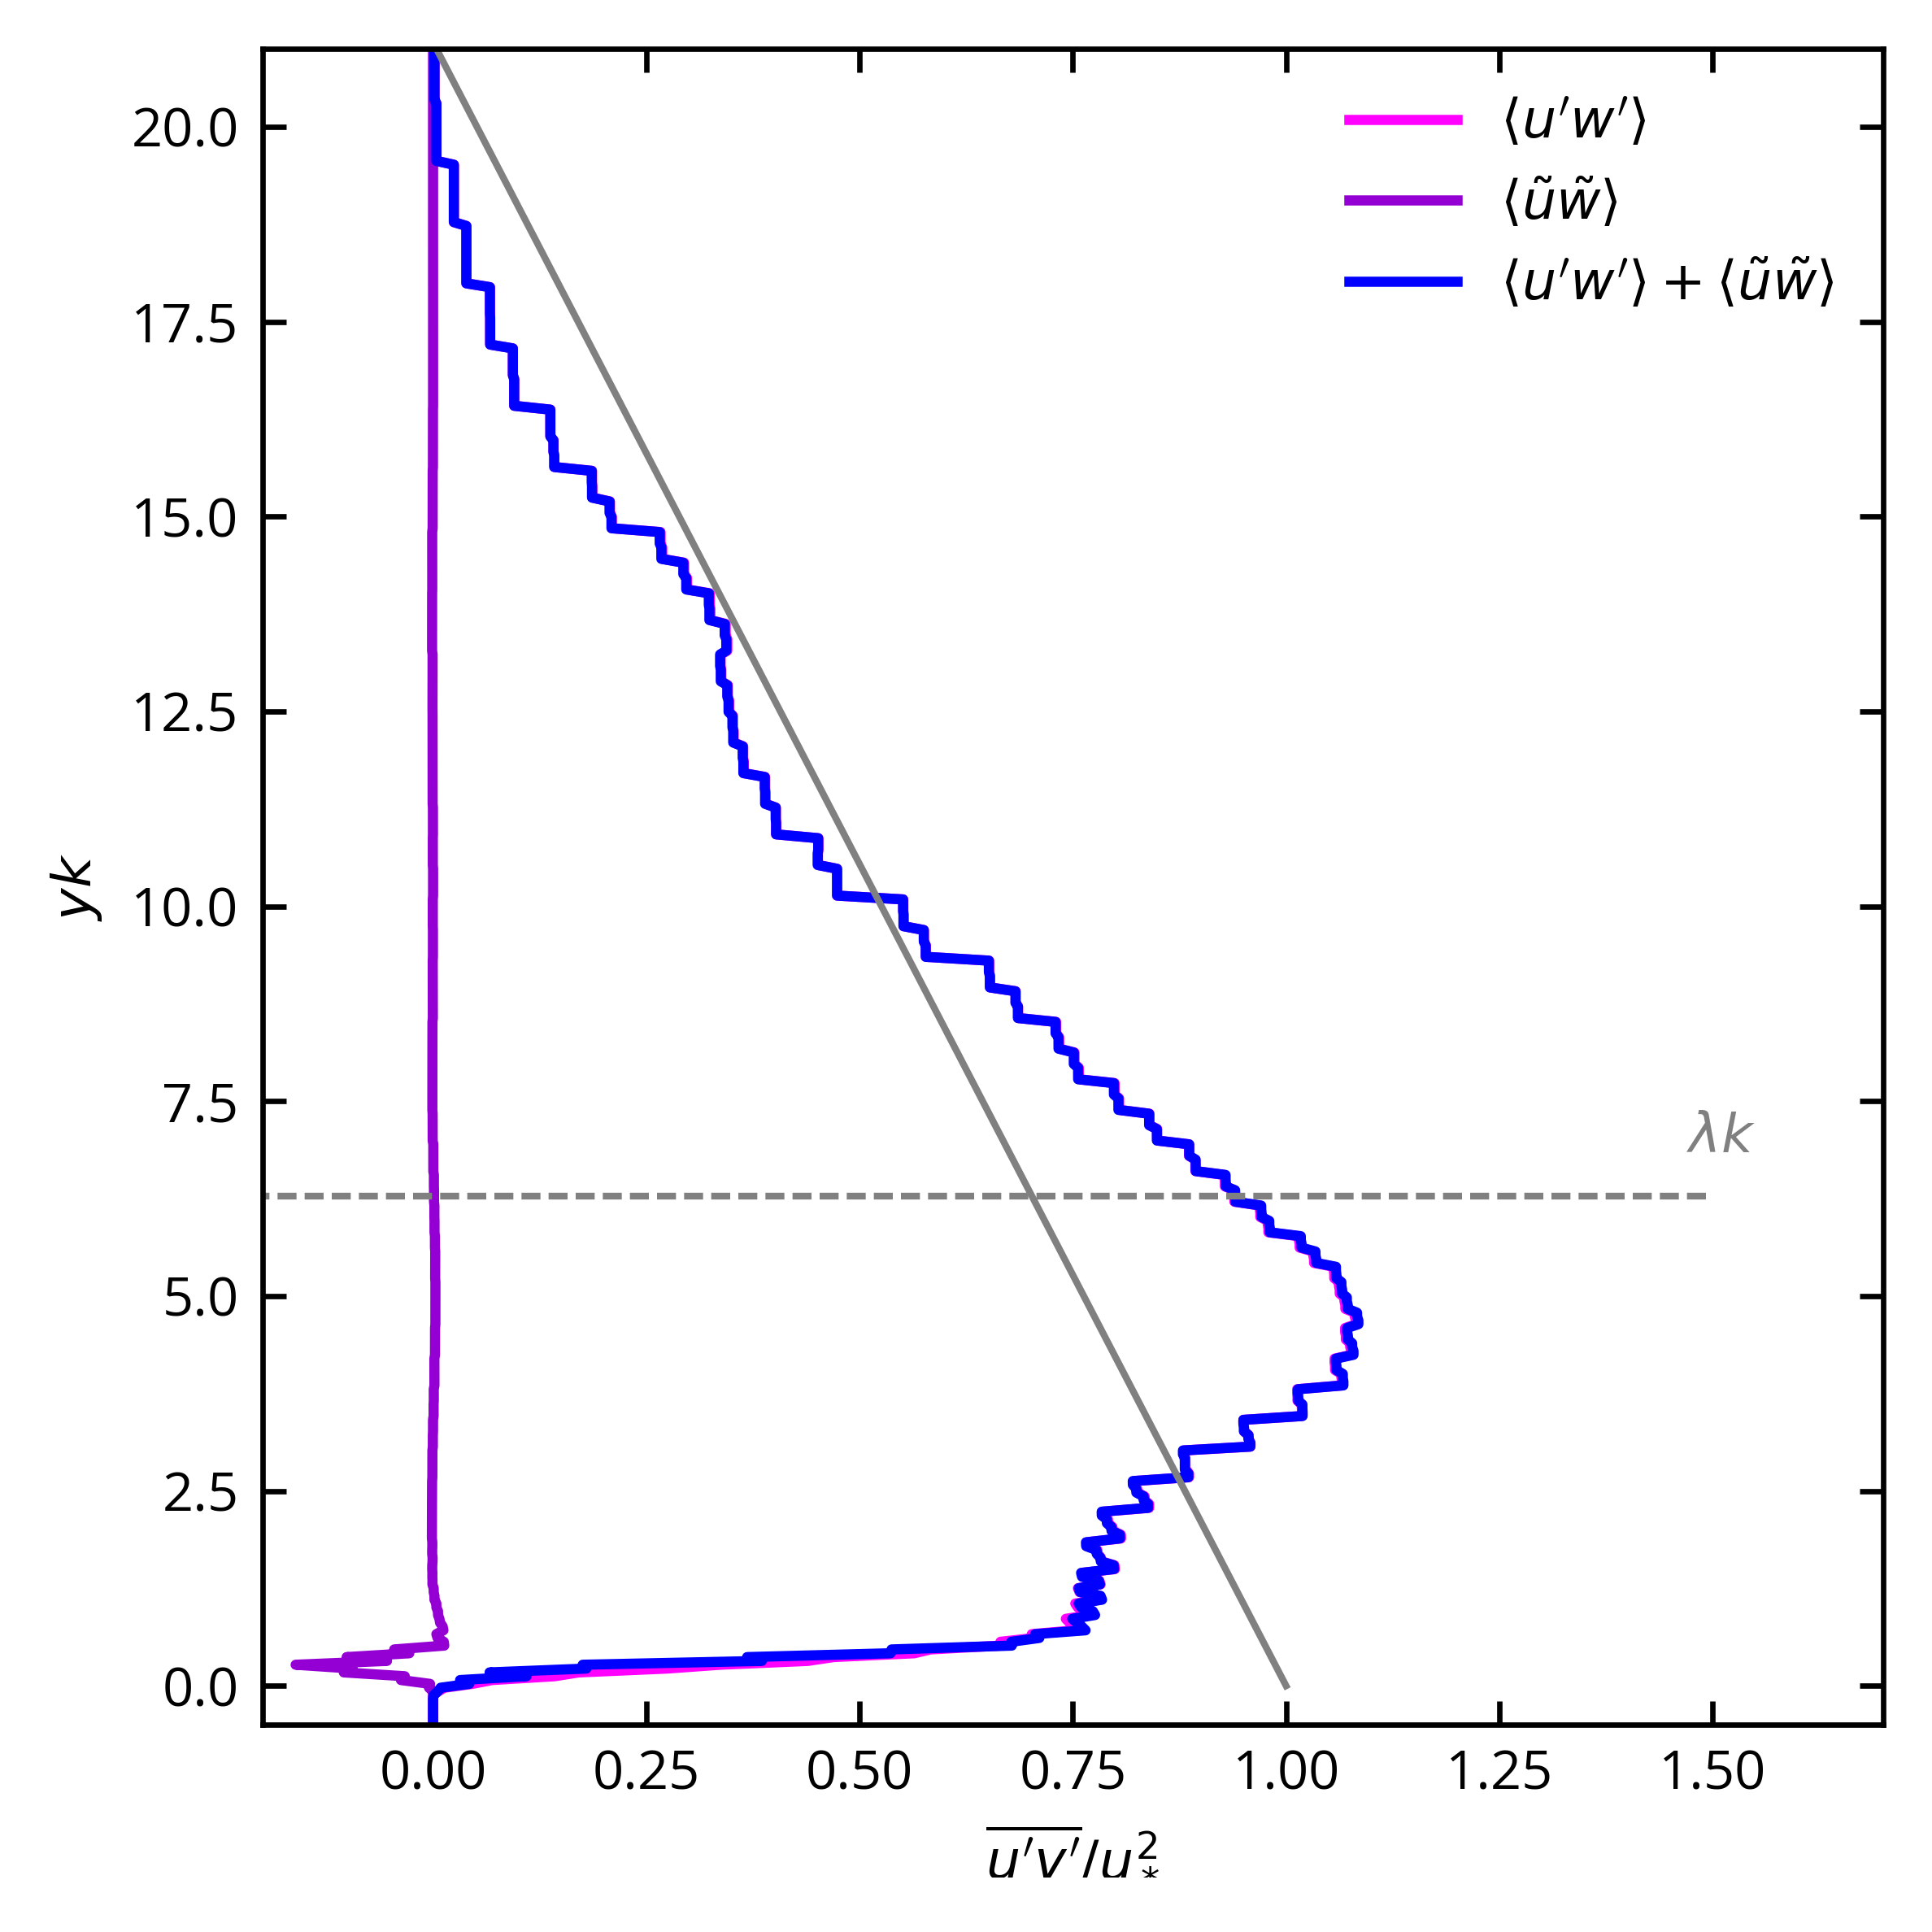

In [53]:
"""Reynolds stress and wave stress"""
# uv_tilde = (uy_tmean - uy_txmean)*(ux_tmean - ux_txmean)
# uv_prime = (case.uy[10]-uy_tmean)*(case.ux[10]-ux_tmean)
# uv_prime = field_alter(case, case.tstat[10], ux_tmean, uy_tmean)
# img = plt.imshow(np.rot90(-uv_tilde)/0.25**2, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 0.1, vmin = -0.1) 
# plt.axis('off')
# L0 = 2*np.pi; NGRID = 512
# xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
# plt.plot(xarray, case.eta[0], c='k', lw=1)

fig = plt.figure()

"""Average over x"""
plt.plot(np.average(-uv_prime, axis=0)/0.25**2, (case.yarray-1)*case.k, color='magenta', 
         label=r'$\langle u^{\prime}w^{\prime}\rangle$')
# plt.plot(np.average(visc, axis=0)/0.25**2, (case.yarray-1)*case.k, '-.', color='magenta')
plt.plot(np.average(-uv_tilde, axis=(0,1))/0.25**2, (case.yarray-1)*case.k, color='darkviolet', 
         label=r'$\langle\tilde{u}\tilde{w}\rangle$')
norm = 1-(case.yarray-1)/(case.yarray[-1]-1)
plt.plot((np.average(-uv_prime, axis=0)/0.25**2+np.average(-uv_tilde, axis=(0,1))/0.25**2), 
        (case.yarray-1)*case.k, color='blue', label=r'$\langle u^{\prime}w^{\prime}\rangle+\langle\tilde{u}\tilde{w}\rangle$')

# plt.plot((np.average(-uv_prime, axis=0)/0.25**2+np.average(-uv_tilde, axis=(0,1))/0.25**2)/norm, 
#         (case.yarray-1)*case.k, color='blue', label=r'$\langle u^{\prime}w^{\prime}\rangle+\langle\tilde{u}\tilde{w}\rangle$')


"""Plot where the one wavelength height is."""
plt.plot(np.linspace(0,1,100), (case.yarray[-1]-1)*(1-np.linspace(0,1,100))*case.k, c='gray',lw=1)
plt.plot(np.linspace(-0.5,1.5,100), np.ones(100)*2*np.pi, '--', c='gray',lw=1)
ax = plt.gca()
ax.text(0.9, 0.35, r'$\lambda k$', ha='center', va='center', color='gray', transform=ax.transAxes)
plt.xlabel('$\overline{u^{\prime} v^{\prime}}/u_*^2$'); plt.ylabel(r'$yk$')
plt.legend()
plt.ylim([-0.5,21])
plt.xlim([-0.2,1.7])